# <center> H4FT_Business Case #1_PRESENTATION CASE STUDY - PROPOSAL

Thành viên team "Tenacity Titans "

- Phạm Vương Tuệ
-  Đỗ Hải Tùng
- Nguyễn Gia Uyên
- Nguyễn Văn Hào


# TABLE OF CONTENTS
1. Data Cleaning
2. Initial Findings/ Overview/EDA (Exploratory Data Analysis)
3. Feature Selection & Engineering
4. Model Building and Evaluation
5. Conclusion

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# !pip install keras minisom GEMA yellowbrick
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
# import warnings
# from sklearn.preprocessing import PowerTransformer
# from sklearn.preprocessing import StandardScaler
# from scipy import stats
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans
# import plotly.graph_objects as go
# from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings('ignore')


In [140]:
# from tensorflow.keras.utils import plot_model
# !pip install minisom
# from minisom import MiniSom
# from GEMA import Classification, Map
# from yellowbrick.cluster import KElbowVisualizer
# from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer


In [141]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

In [142]:
import plotly.express as px

# 1. Data Cleaning

## Load Dataset

In [143]:
#from google.colab import drive
#drive.mount('/content/drive')

In [144]:
path = 'Dataset.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(path,
                   index_col='Date',  # Set 'Date' column as index
                   parse_dates=['Date'],  # Parse 'Date' column as dates
                   date_parser=lambda dates: pd.to_datetime(dates, format='%m/%d/%Y')
                   )

# Display the DataFrame
print(data)

               Price      Open      High       Low    Vol. Change %
Date                                                               
2023-03-31  18,909.0  18,909.0  19,000.0  18,500.0  26.15M    0.00%
2023-03-30  18,909.0  19,091.0  19,227.0  18,864.0  23.05M    0.00%
2023-03-29  18,909.0  18,818.0  19,182.0  18,818.0  19.74M    0.48%
2023-03-28  18,818.0  19,000.0  19,091.0  18,818.0  13.56M   -0.48%
2023-03-27  18,909.0  18,545.0  19,000.0  18,500.0  22.29M    1.96%
...              ...       ...       ...       ...     ...      ...
2018-01-08  12,443.5  11,991.0  12,443.5  11,940.7  14.19M    3.13%
2018-01-05  12,066.4  12,091.6  12,179.6  11,978.4  14.03M   -0.42%
2018-01-04  12,116.7  12,016.2  12,167.0  11,965.9  17.79M    1.26%
2018-01-03  11,965.9  12,066.4  12,192.1  11,890.5  18.51M   -0.21%
2018-01-02  11,991.0  11,789.9  12,003.6  11,676.8  15.73M    1.81%

[1308 rows x 6 columns]


**Data Understanding**: Stock Price Prediction

Predict the price of the stock HPG from Hoa Phat Group in the manufacturing sector and listed on the Ho Chi Minh Stock Exchange (HOSE).

- This dataset contains **6 features** (cột) và **1308 bản ghi** (dòng)
- Features: Trading date, closing price, opening price, highest price, lowest price, trading volume, and percentage change compared to the previous day.
- From through row, we can see that data for some of the dates is missing the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days

## Data Checking and Transformation

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308 entries, 2023-03-31 to 2018-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     1308 non-null   object
 1   Open      1308 non-null   object
 2   High      1308 non-null   object
 3   Low       1308 non-null   object
 4   Vol.      1308 non-null   object
 5   Change %  1308 non-null   object
dtypes: object(6)
memory usage: 71.5+ KB


<u> <b> Nhận xét</b></u>: Most of the columns are in the wrong data type when they are currently in ` object`. Team processes to convert them to the correct type:

- `Date` convert to date time
- `Price`, `Open`, `High`, `Low`, `Vol`, `Change %` convert to `float`



In [146]:
data['High'] = data['High'].astype(str).str.replace(',', '').astype(float)
data['Low'] = data['Low'].astype(str).str.replace(',', '').astype(float)
data['Open'] = data['Open'].astype(str).str.replace(',', '').astype(float)
data['Price'] = data['Price'].astype(str).str.replace(',', '').astype(float)
data['Change %'] = data['Change %'].astype(str).str.replace('%', '').astype(float)

# Define a function to handle conversion of 'Vol.' column
def convert_volume(value):
    value = str(value)
    if 'K' in value:
        return float(value.replace('K', 'e3').replace(',', ''))
    elif 'M' in value:
        return float(value.replace('M', 'e6').replace(',', ''))
    else:
        return float(value.replace(',', ''))

# Apply the function to convert 'Vol.' column to float
data['Vol.'] = data['Vol.'].apply(convert_volume)

data

Price     Open     High      Low        Vol.  Change %
Date                                                                
2023-03-31  18909.0  18909.0  19000.0  18500.0  26150000.0      0.00
2023-03-30  18909.0  19091.0  19227.0  18864.0  23050000.0      0.00
2023-03-29  18909.0  18818.0  19182.0  18818.0  19740000.0      0.48
2023-03-28  18818.0  19000.0  19091.0  18818.0  13560000.0     -0.48
2023-03-27  18909.0  18545.0  19000.0  18500.0  22290000.0      1.96
...             ...      ...      ...      ...         ...       ...
2018-01-08  12443.5  11991.0  12443.5  11940.7  14190000.0      3.13
2018-01-05  12066.4  12091.6  12179.6  11978.4  14030000.0     -0.42
2018-01-04  12116.7  12016.2  12167.0  11965.9  17790000.0      1.26
2018-01-03  11965.9  12066.4  12192.1  11890.5  18510000.0     -0.21
2018-01-02  11991.0  11789.9  12003.6  11676.8  15730000.0      1.81

[1308 rows x 6 columns]

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308 entries, 2023-03-31 to 2018-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1308 non-null   float64
 1   Open      1308 non-null   float64
 2   High      1308 non-null   float64
 3   Low       1308 non-null   float64
 4   Vol.      1308 non-null   float64
 5   Change %  1308 non-null   float64
dtypes: float64(6)
memory usage: 71.5 KB


Kiểm tra lại các dữ liệu sau khi transform đã trở lại định dạng đúng

## Handling missing values/ duplicates and other issues

In [148]:
# Kiểm tra missing values

null_count = data.isnull().sum()
null_percentage = data.isnull().sum()/3069 * 100
null_stats = pd.DataFrame({
    # 'Feature': data.columns,
    'Null_Count': null_count,
    'Percentage': null_percentage
})
null_stats


Null_Count  Percentage
Price              0         0.0
Open               0         0.0
High               0         0.0
Low                0         0.0
Vol.               0         0.0
Change %           0         0.0

<u> <b> Comment</b></u>: The dataset has no missing values.

In [149]:
# Kiểm tra values bị trùng lặp
data.nunique()

Price        808
Open         772
High         803
Low          795
Vol.        1140
Change %     650
dtype: int64

<u> <b> Comment</b></u>:
Because this is a table that stores transactions in time, the Date feature will have unique values => Dataset does not have any data with duplicate dates.

In [150]:
data

Price     Open     High      Low        Vol.  Change %
Date                                                                
2023-03-31  18909.0  18909.0  19000.0  18500.0  26150000.0      0.00
2023-03-30  18909.0  19091.0  19227.0  18864.0  23050000.0      0.00
2023-03-29  18909.0  18818.0  19182.0  18818.0  19740000.0      0.48
2023-03-28  18818.0  19000.0  19091.0  18818.0  13560000.0     -0.48
2023-03-27  18909.0  18545.0  19000.0  18500.0  22290000.0      1.96
...             ...      ...      ...      ...         ...       ...
2018-01-08  12443.5  11991.0  12443.5  11940.7  14190000.0      3.13
2018-01-05  12066.4  12091.6  12179.6  11978.4  14030000.0     -0.42
2018-01-04  12116.7  12016.2  12167.0  11965.9  17790000.0      1.26
2018-01-03  11965.9  12066.4  12192.1  11890.5  18510000.0     -0.21
2018-01-02  11991.0  11789.9  12003.6  11676.8  15730000.0      1.81

[1308 rows x 6 columns]

# 2. EDA (Exploratory Data Analysis)

### Initial Findings

In [151]:
# profile1 = ProfileReport((data), title="Initial Findings")
# profile1

In [152]:
data.describe()

Price          Open          High           Low          Vol.  \
count   1308.000000   1308.000000   1308.000000   1308.000000  1.308000e+03   
mean   19249.098318  19261.464985  19541.894801  18986.827905  2.425365e+07   
std     9780.769912   9809.760926   9929.208070   9676.520954  1.502148e+07   
min     7411.800000   7000.000000   7640.600000   6977.200000  3.320000e+06   
25%    11605.100000  11613.900000  11736.650000  11445.475000  1.319250e+07   
50%    14957.300000  14944.750000  15183.600000  14719.000000  2.102500e+07   
75%    24003.825000  24081.000000  24339.325000  23621.425000  3.120250e+07   
max    43895.800000  43895.800000  44198.500000  43517.400000  1.096200e+08   

          Change %  
count  1308.000000  
mean      0.064274  
std       2.374579  
min      -7.000000  
25%      -1.132500  
50%       0.000000  
75%       1.222500  
max       6.940000

In [153]:
import seaborn as sb

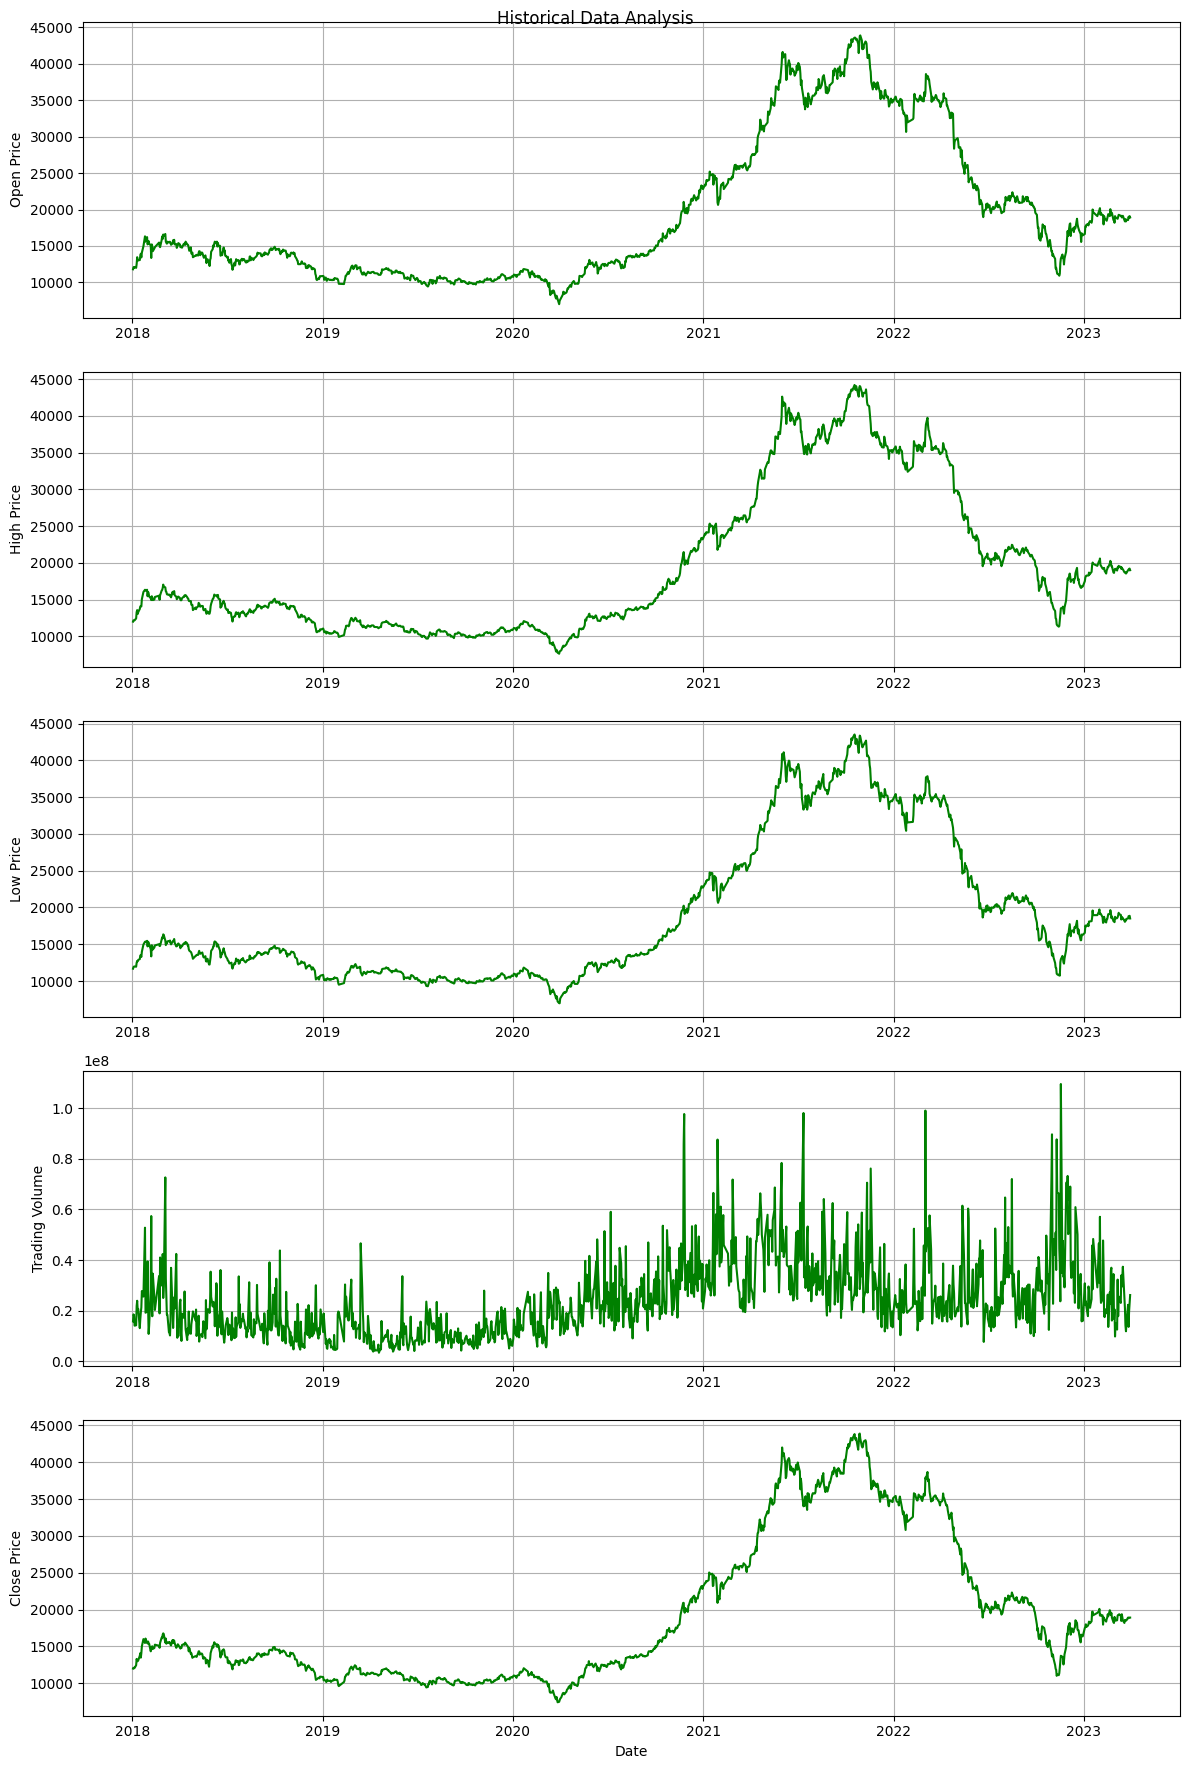

In [154]:
plt.figure(figsize=(12, 18))

# Biểu đồ Open
plt.subplot(5, 1, 1)
plt.plot(data.index, data['Open'], color='green')
plt.ylabel('Open Price')
plt.grid(True)

# Biểu đồ High
plt.subplot(5, 1, 2)
plt.plot(data.index, data['High'], color='green')
plt.ylabel('High Price')
plt.grid(True)

# Biểu đồ Low
plt.subplot(5, 1, 3)
plt.plot(data.index, data['Low'], color='green')
plt.ylabel('Low Price')
plt.grid(True)

# Biểu đồ Vol. (trading volume)
plt.subplot(5, 1, 4)
plt.plot(data.index, data['Vol.'], color='green')
plt.ylabel('Trading Volume')
plt.grid(True)

# Biểu đồ Price (close price)
plt.subplot(5, 1, 5)
plt.plot(data.index, data['Price'], color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

# Thiết lập tiêu đề chung
plt.suptitle('Historical Data Analysis')

# Căn chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()

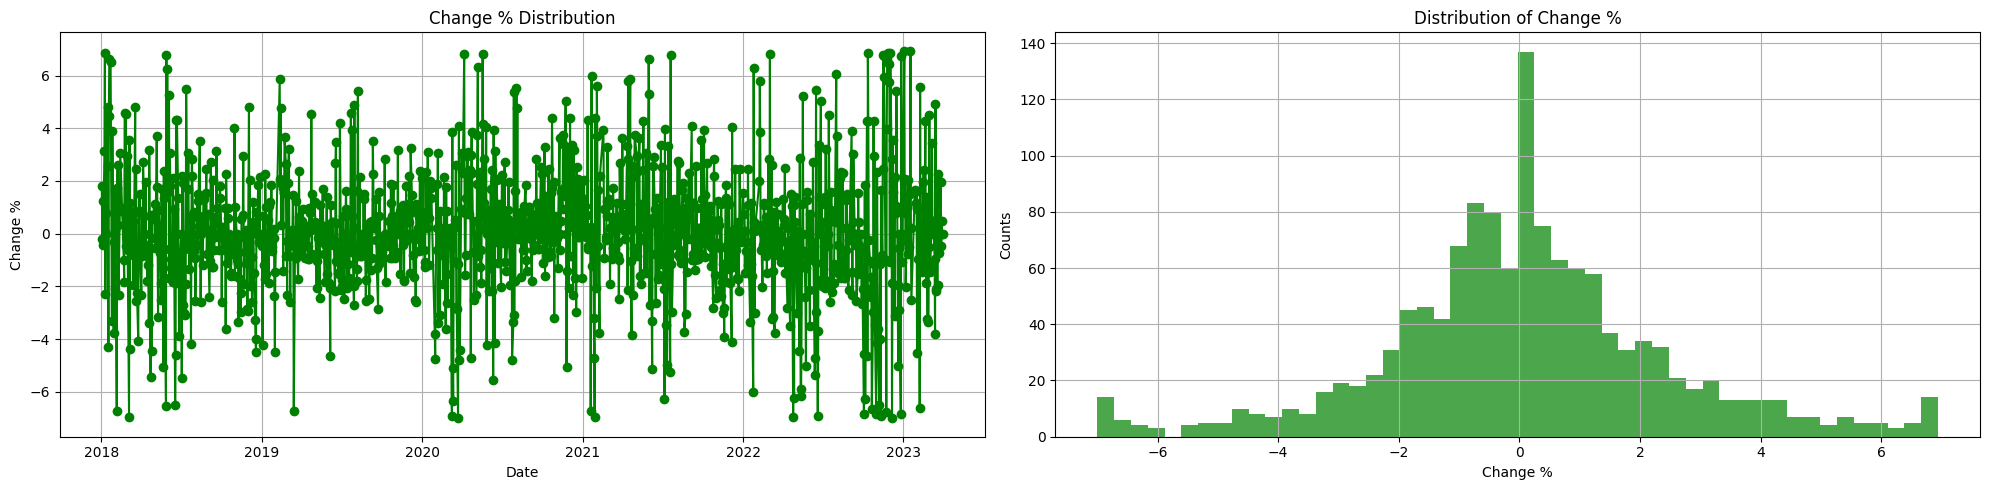

In [155]:
change_percent = data['Change %']

# Tạo hình với kích thước đủ lớn để chứa hai biểu đồ
plt.figure(figsize=(20, 5))

# Biểu đồ cột cho 'Change %'
plt.subplot(1, 2, 1)  # Tạo subplot đầu tiên trong lưới 1x2
plt.plot(data.index, data['Change %'], marker='o', linestyle='-', color='green')
plt.ylabel('Change %')
plt.xlabel('Date')
plt.title('Change % Distribution')
plt.grid(True)

# Biểu đồ histogram cho cột 'Change %'
plt.subplot(1, 2, 2)  # Tạo subplot thứ hai trong lưới 1x2
data['Change %'].hist(bins=50, color='green', alpha=0.7)
plt.xlabel('Change %')
plt.ylabel('Counts')
plt.title('Distribution of Change %')
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

<u> <b> Comment</b></u>:

The price chart is quite gloomy in the period 2018 - Q1 2020. From Q2 2020, the price is showing an upward trend and peaks around the end of 2021 at 43895.8.Then the price tends to decrease again in the next 1 year.

**Possible Explanation:**

- 2020 :Vietnam's economy in the first 11 months of 2020 continued to maintain recovery momentum under new normal conditions. → Conditions for steel industry growth.

- 2021: The steel industry grew strongly because Vietnamese businesses boosted exports and output. HPG Group has seized the opportunity to conquer foreign markets.

- 2022: The impact of Covid caused raw material prices to increase, interest rates increased, banks tightened credit, causing HPG Group's import-export output to decrease.


Reference:

2020:
https://www.gso.gov.vn/du-lieu-va-so-lieu-thong-ke/2021/01/kinh-te-viet-nam-2020-mot-nam-tang-truong-day-ban-linh/

https://vsa.com.vn/tinh-hinh-thi-truong-thep-viet-nam-thang-11-2020-va-11-thang-dau-nam-2020/

2021:
https://mediacdn.vietnambiz.vn/171464876016439296/2022/1/28/bao-cao-thep-nam-2021-final-16433803525031541965939.pdf

https://vsa.com.vn/tinh-hinh-thi-truong-thep-viet-nam-thang-12-2021-va-nam-2021/

2022:
https://mediacdn.vietnambiz.vn/1881912202208555/files/2023/02/05/bao-cao-thi-truong-thep-2022-2023020513262685.pdf

https://vsa.com.vn/tinh-hinh-thi-truong-thep-viet-nam-thang-12-2022-va-nam-2022/

https://mediacdn.vietnambiz.vn/1881912202208555/files/2023/02/05/bao-cao-thi-truong-thep-2022-2023020513262685.pdf

In [156]:

plt.figure(figsize=(10, 5))
plt.scatter(data['Vol.'], data['Price'], alpha=0.5, color='green')
plt.title('Close Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)  # Hiển thị lưới
plt.show()

From the chart it can be seen that there are 2 price groups and Vol

- Group 1: Most of the stock prices are traded around 10000-15000 with quantities around 10-25 M
- Group 2: stocks traded for 35000-40000 with quantity 20-80M


In [157]:
df = data.resample("Q").mean()
df

Price          Open          High           Low  \
Date                                                                 
2018-03-31  14874.424561  14775.194737  15124.931579  14533.077193   
2018-06-30  14261.737097  14290.646774  14507.117742  14022.562903   
2018-09-30  13367.565625  13351.893750  13532.535938  13195.176563   
2018-12-31  12928.823077  12963.473846  13092.341538  12800.772308   
2019-03-31  11060.246552  11066.010345  11210.727586  10924.025862   
2019-06-30  11168.960656  11194.721311  11284.385246  11083.080328   
2019-09-30  10173.443077  10178.020000  10292.407692  10063.990769   
2019-12-31  10302.480303  10305.943939  10407.846970  10218.256061   
2020-03-31  10238.720339  10222.042373  10402.725424  10079.755932   
2020-06-30  10994.833871  10949.814516  11161.230645  10789.687097   
2020-09-30  13373.756923  13349.547692  13513.875385  13233.155385   
2020-12-31  18836.442424  18764.219697  19046.353030  18526.850000   
2021-03-31  24572.520690  24545.606897  24897.893103  24213.491379   
2021-06-30  35067.241935  34946.759677  35531.045161  34492.074194   
2021-09-30  37141.729688  37186.082812  37678.609375  36672.853125   
2021-12-31  39168.507576  39315.290909  39726.390909  38837.693939   
2022-03-31  34897.413793  34991.365517  35489.825862  34516.396552   
2022-06-30  26622.058065  26802.269355  27207.770968  26241.604839   
2022-09-30  20816.046875  20840.156250  21124.281250  20573.859375   
2022-12-31  15520.323077  15583.215385  15988.092308  15140.569231   
2023-03-31  18818.949153  18831.237288  19145.627119  18518.474576   

                    Vol.  Change %  
Date                                
2018-03-31  2.413105e+07  0.492632  
2018-06-30  1.673742e+07 -0.148226  
2018-09-30  1.537891e+07  0.168594  
2018-12-31  1.392523e+07 -0.463692  
2019-03-31  1.373828e+07  0.089828  
2019-06-30  8.037049e+06 -0.075574  
2019-09-30  1.128231e+07 -0.088769  
2019-12-31  1.101030e+07  0.111515  
2020-03-31  1.649831e+07 -0.527797  
2020-06-30  2.265581e+07  0.783871  
2020-09-30  2.389185e+07  0.295692  
2020-12-31  3.470742e+07  0.704697  
2021-03-31  3.803690e+07  0.238103  
2021-06-30  4.249532e+07  0.678387  
2021-09-30  3.695812e+07  0.066719  
2021-12-31  3.190061e+07 -0.184242  
2022-03-31  2.777724e+07 -0.024310  
2022-06-30  2.761097e+07 -0.796613  
2022-09-30  2.560688e+07 -0.062031  
2022-12-31  4.086769e+07 -0.160462  
2023-03-31  2.580593e+07  0.277458

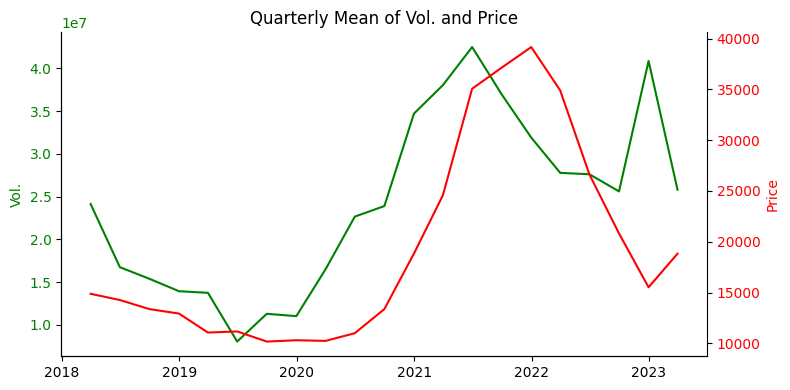

In [158]:

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plotting the 'Vol.' column on the primary y-axis
ax1.plot(df.index, df['Vol.'], color='green', label='Vol.')
ax1.set_ylabel('Vol.', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a secondary y-axis and plot the 'Price' column on it
ax2 = ax1.twinx()
ax2.plot(df.index, df['Price'], color='red', label='Price')
ax2.set_ylabel('Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Setting the title and removing the top and right spines
plt.title('Quarterly Mean of Vol. and Price')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.tight_layout()  # Adjust layout to make room for the secondary y-axis

# Show the plot
plt.show()

- We see that from 2018 to 2022, the price increased sharply, meaning the average quarterly transaction volume also increased.

- However, immediately after that, the transaction volume  decreased => the price also decreased until Q3-2022, when there was a critical change. When the transaction volume reached its second peak => the price bottomed and immediately after that, when the price increased, the transaction volume immediately decreased significantly.

- It can be seen that there is a delay from 2018-1022 => when the number of transactions increased, a period of time later, the price of HPG increased => it was not the amount of transactions that increased, but the price immediately increased.

- However, in the period 2023 => realize price sensitivity when output changes price immediately changes accordingly.

Possible Assumption:

-  Openning Price could be influenced by many macro and micro factors (GDP, CPI...), not necessarily  from Trade Volume.

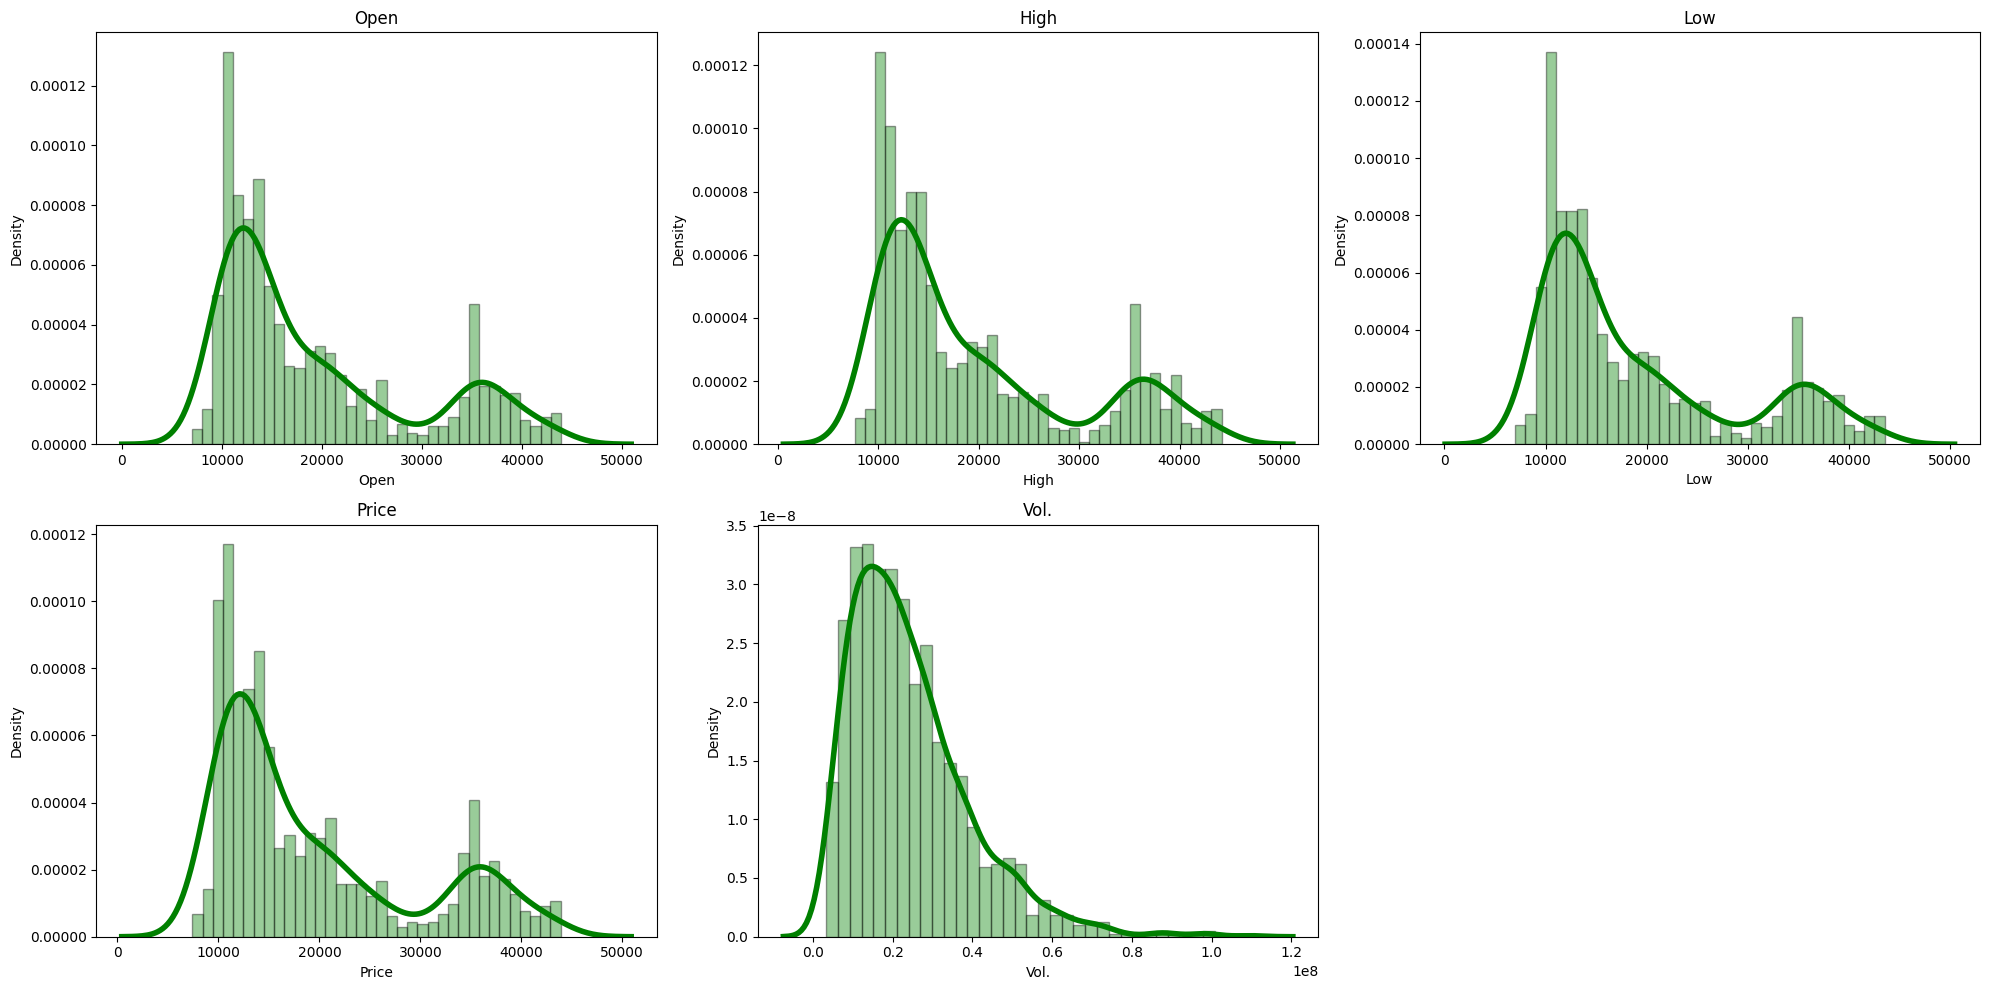

In [159]:
features = ['Open', 'High', 'Low', 'Price', 'Vol.']

plt.figure(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.distplot(data[col], color='green', hist=True, kde=True,
                bins=int(180/5), hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4})

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

We use a probability distribution to visualize The stock price changed significantly when there were 2 price peaks(10.000 - 15.000 and around 35.000-40000) .But the Volume data is right-skewed mean that did   

Possible Assumption:

- Shows the reliability and reputation of stock prices without any bad stock market activity (bear traps, bull traps, stock market bubbles...)
- Or it can be interpreted that there are 2 customer groups with different "investment taste" of HPG stock price


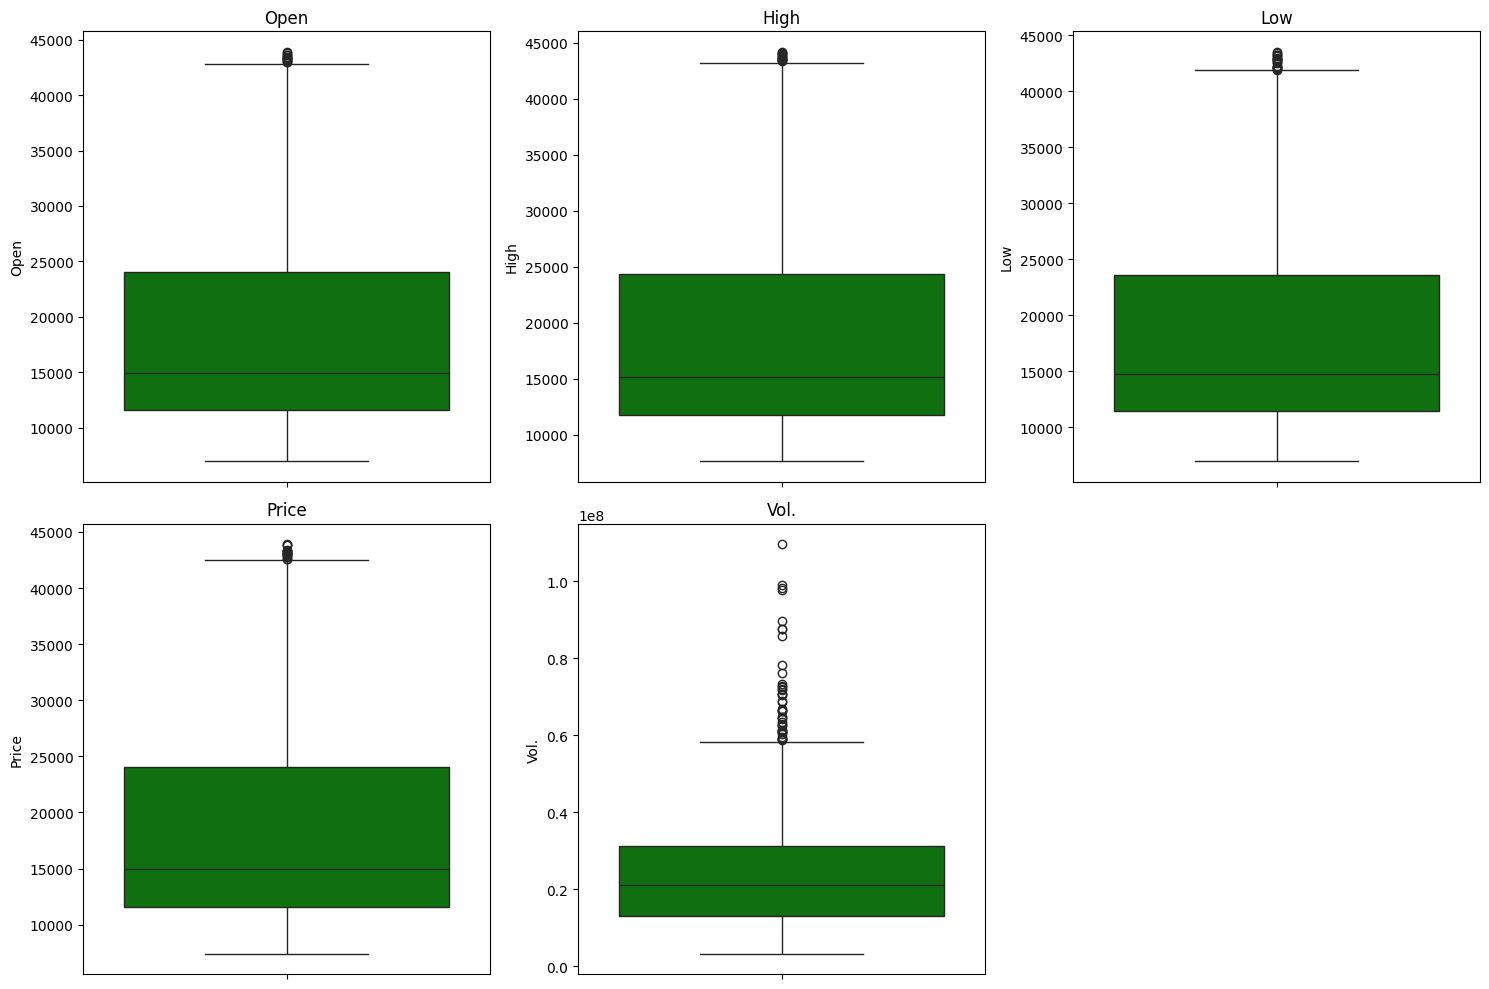

In [160]:
plt.figure(figsize=(15, 10))
features = ['Open', 'High', 'Low', 'Price', 'Vol.']
# Loop through each feature and plot its box plot
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.boxplot(data=data[col], color='green')
    plt.title(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Price: There are only a few outlier points, but for Vol it's the opposite
Volume Trade: Record a large number of outliers

=> This can be inferred from the purchase of large quantities of HPG stock => Stock shark is a term that refers to large investors with strong financial potential and advantages in information in the market. . Based on these advantages, they carry out large value transactions, affecting the market as well as individual investors.
Assumption:

The steel industry's trade situation changes significantly (when the industry's trade situation peaks in 2021-2022) → Potential in stock Price would be profitable leading to a sudden increase in Trading Volume

In [161]:
data.reset_index(inplace=True)

# Tách cột 'Date' thành các cột 'day', 'month', và 'year'
splitted = data['Date'].dt.strftime('%m/%d/%Y').str.split('/', expand=True)

data['month'] = splitted[0].astype('int')
data['day'] = splitted[1].astype('int')
data['year'] = splitted[2].astype('int')

data

Date    Price     Open     High      Low        Vol.  Change %  \
0    2023-03-31  18909.0  18909.0  19000.0  18500.0  26150000.0      0.00   
1    2023-03-30  18909.0  19091.0  19227.0  18864.0  23050000.0      0.00   
2    2023-03-29  18909.0  18818.0  19182.0  18818.0  19740000.0      0.48   
3    2023-03-28  18818.0  19000.0  19091.0  18818.0  13560000.0     -0.48   
4    2023-03-27  18909.0  18545.0  19000.0  18500.0  22290000.0      1.96   
...         ...      ...      ...      ...      ...         ...       ...   
1303 2018-01-08  12443.5  11991.0  12443.5  11940.7  14190000.0      3.13   
1304 2018-01-05  12066.4  12091.6  12179.6  11978.4  14030000.0     -0.42   
1305 2018-01-04  12116.7  12016.2  12167.0  11965.9  17790000.0      1.26   
1306 2018-01-03  11965.9  12066.4  12192.1  11890.5  18510000.0     -0.21   
1307 2018-01-02  11991.0  11789.9  12003.6  11676.8  15730000.0      1.81   

      month  day  year  
0         3   31  2023  
1         3   30  2023  
2         3   29  2023  
3         3   28  2023  
4         3   27  2023  
...     ...  ...   ...  
1303      1    8  2018  
1304      1    5  2018  
1305      1    4  2018  
1306      1    3  2018  
1307      1    2  2018  

[1308 rows x 10 columns]

In [162]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()

Date    Price     Open     High      Low        Vol.  Change %  month  \
0 2023-03-31  18909.0  18909.0  19000.0  18500.0  26150000.0      0.00      3   
1 2023-03-30  18909.0  19091.0  19227.0  18864.0  23050000.0      0.00      3   
2 2023-03-29  18909.0  18818.0  19182.0  18818.0  19740000.0      0.48      3   
3 2023-03-28  18818.0  19000.0  19091.0  18818.0  13560000.0     -0.48      3   
4 2023-03-27  18909.0  18545.0  19000.0  18500.0  22290000.0      1.96      3   

   day  year  is_quarter_end  
0   31  2023               1  
1   30  2023               1  
2   29  2023               1  
3   28  2023               1  
4   27  2023               1

A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

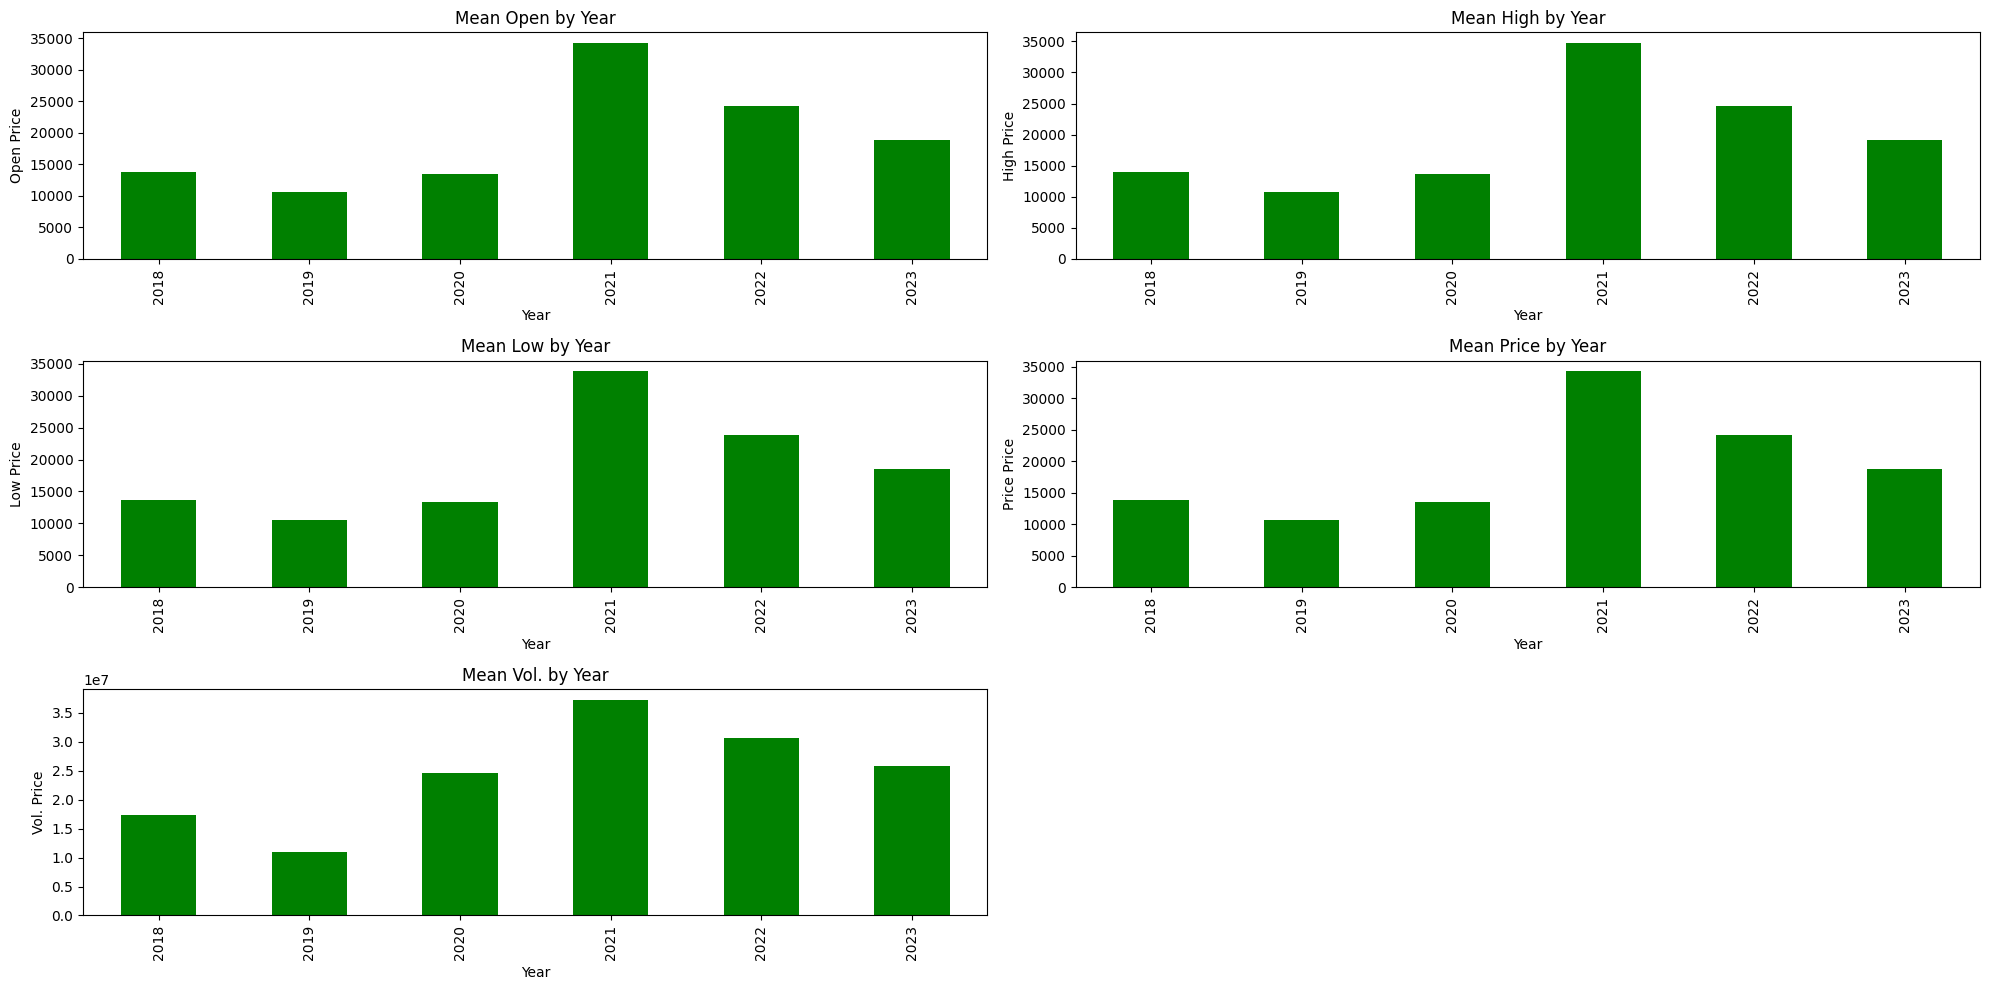

In [163]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

columns = ['Open', 'High', 'Low', 'Price', 'Vol.']

data_grouped = data.groupby('year').mean()

for i, col in enumerate(columns):
    ax = axes[i//2, i%2]  # Định vị trí của biểu đồ con
    data_grouped[col].plot.bar(color='green', ax=ax)
    ax.set_title(f'Mean {col} by Year')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{col} Price')
if len(columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

- From the above bar graph, we can concluded that the stock Prices have doubled from the year 2018 to that in 2021.

- The business situation of the industry and HPG Group was positive (2019-2021), bringing potential to business


In [164]:
data.groupby('is_quarter_end').mean()

Date         Price          Open  \
is_quarter_end                                                             
0              2020-07-27 13:50:03.500583424  19027.095916  19024.351225   
1              2020-09-29 06:39:06.784922368  19670.952106  19712.033703   

                        High           Low          Vol.  Change %     month  \
is_quarter_end                                                                 
0               19312.851692  18754.731505  2.453102e+07  0.149183  6.045508   
1               19977.127494  19427.862528  2.372659e+07 -0.097073  7.237251   

                      day         year  
is_quarter_end                          
0               15.786464  2020.110852  
1               15.962306  2020.186253

Here are some of the important observations of the above-grouped data:

- Prices was higher in the months which were quarter end as compared to that of the non-quarter end months.
- The volume of trades was lower in the months which were quarter end.

Assumption:

At the end of each quarter was information about the health of the market and the company's stocks. HPG Group also was paying attention to this and trying to had good results at the end of the quarter.



In this section, we analyze various financial indicators including the Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD)
, and Bollinger Bands. We provide definitions, formulas, and the economic significance of these indicators in the context of stock price prediction.

### Rolling_Moving Average (MA) and Exponential Moving Average (EMA)

**The MA line (also known as Moving Average)** is a moving average line, showing fluctuations and indicating the trend of stock prices over a period of time.

**Purpose**
- The main purpose of the MA line is to track whether the price is moving in an uptrend or downtrend or without a trend. The MA line is considered a slow indicator, it has no effect for forecasting but will mainly move according to the price movements that have been formed.

- MA lines often take common milestones such as 10, 20 days for short-term MA, 50 days for medium-term and 100 or 200 days for long-term. The average lines will have a certain lag compared to the price (especially in the short term).

**MA Types**
There are three most common types of moving averages used in stock technical analysis, including **Simple Moving Average (SMA), Exponential Moving Average (EMA), and Weighted Moving Average (WMA).**

#### Simple Moving Average(MA)

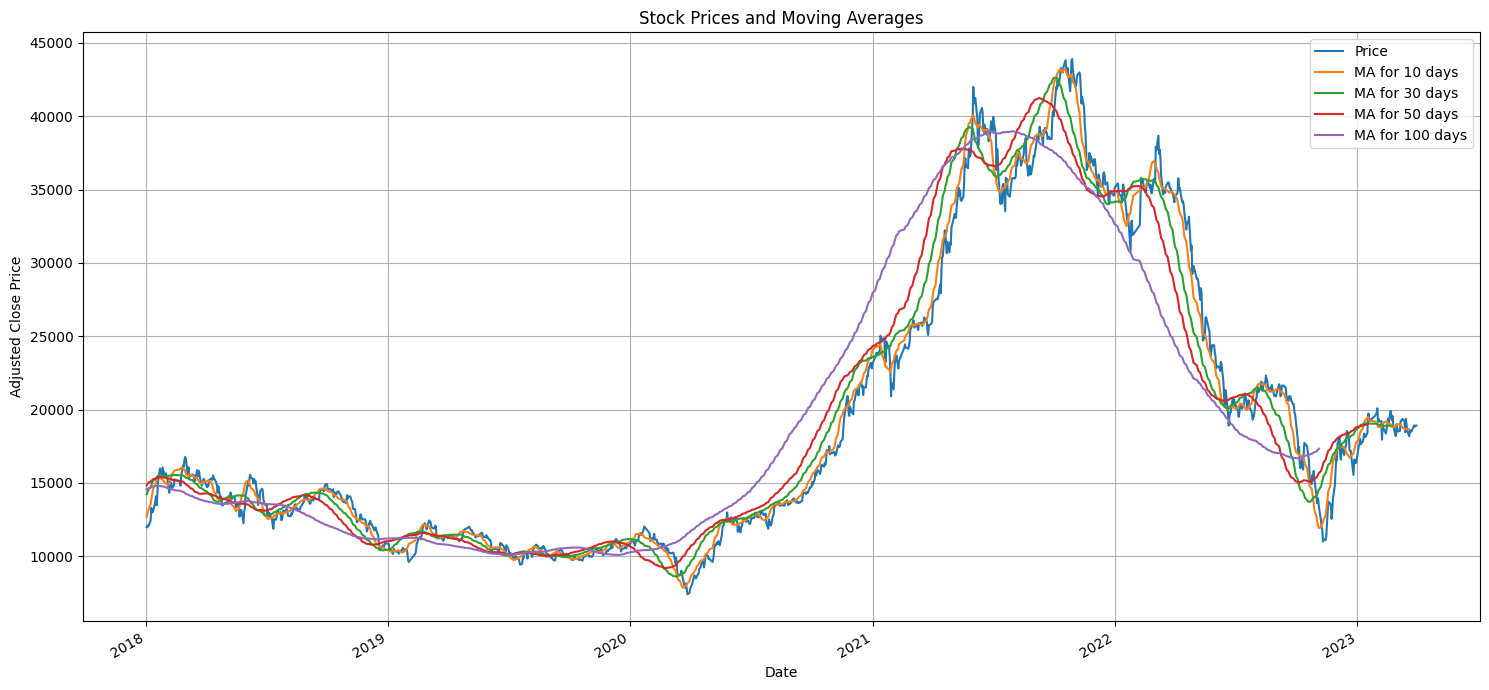

In [165]:
data.set_index('Date', inplace=True)

# Tính các đường trung bình động (MA) GT TB dóng cửa của các ngày trước đó
ma_day = [10, 30, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Price'].rolling(ma).mean()

# Vẽ biểu đồ cho 'data'
fig, ax = plt.subplots(figsize=(15, 7))

data[['Price', 'MA for 10 days', 'MA for 30 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=ax)
ax.set_title('Stock Prices and Moving Averages')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
ax.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

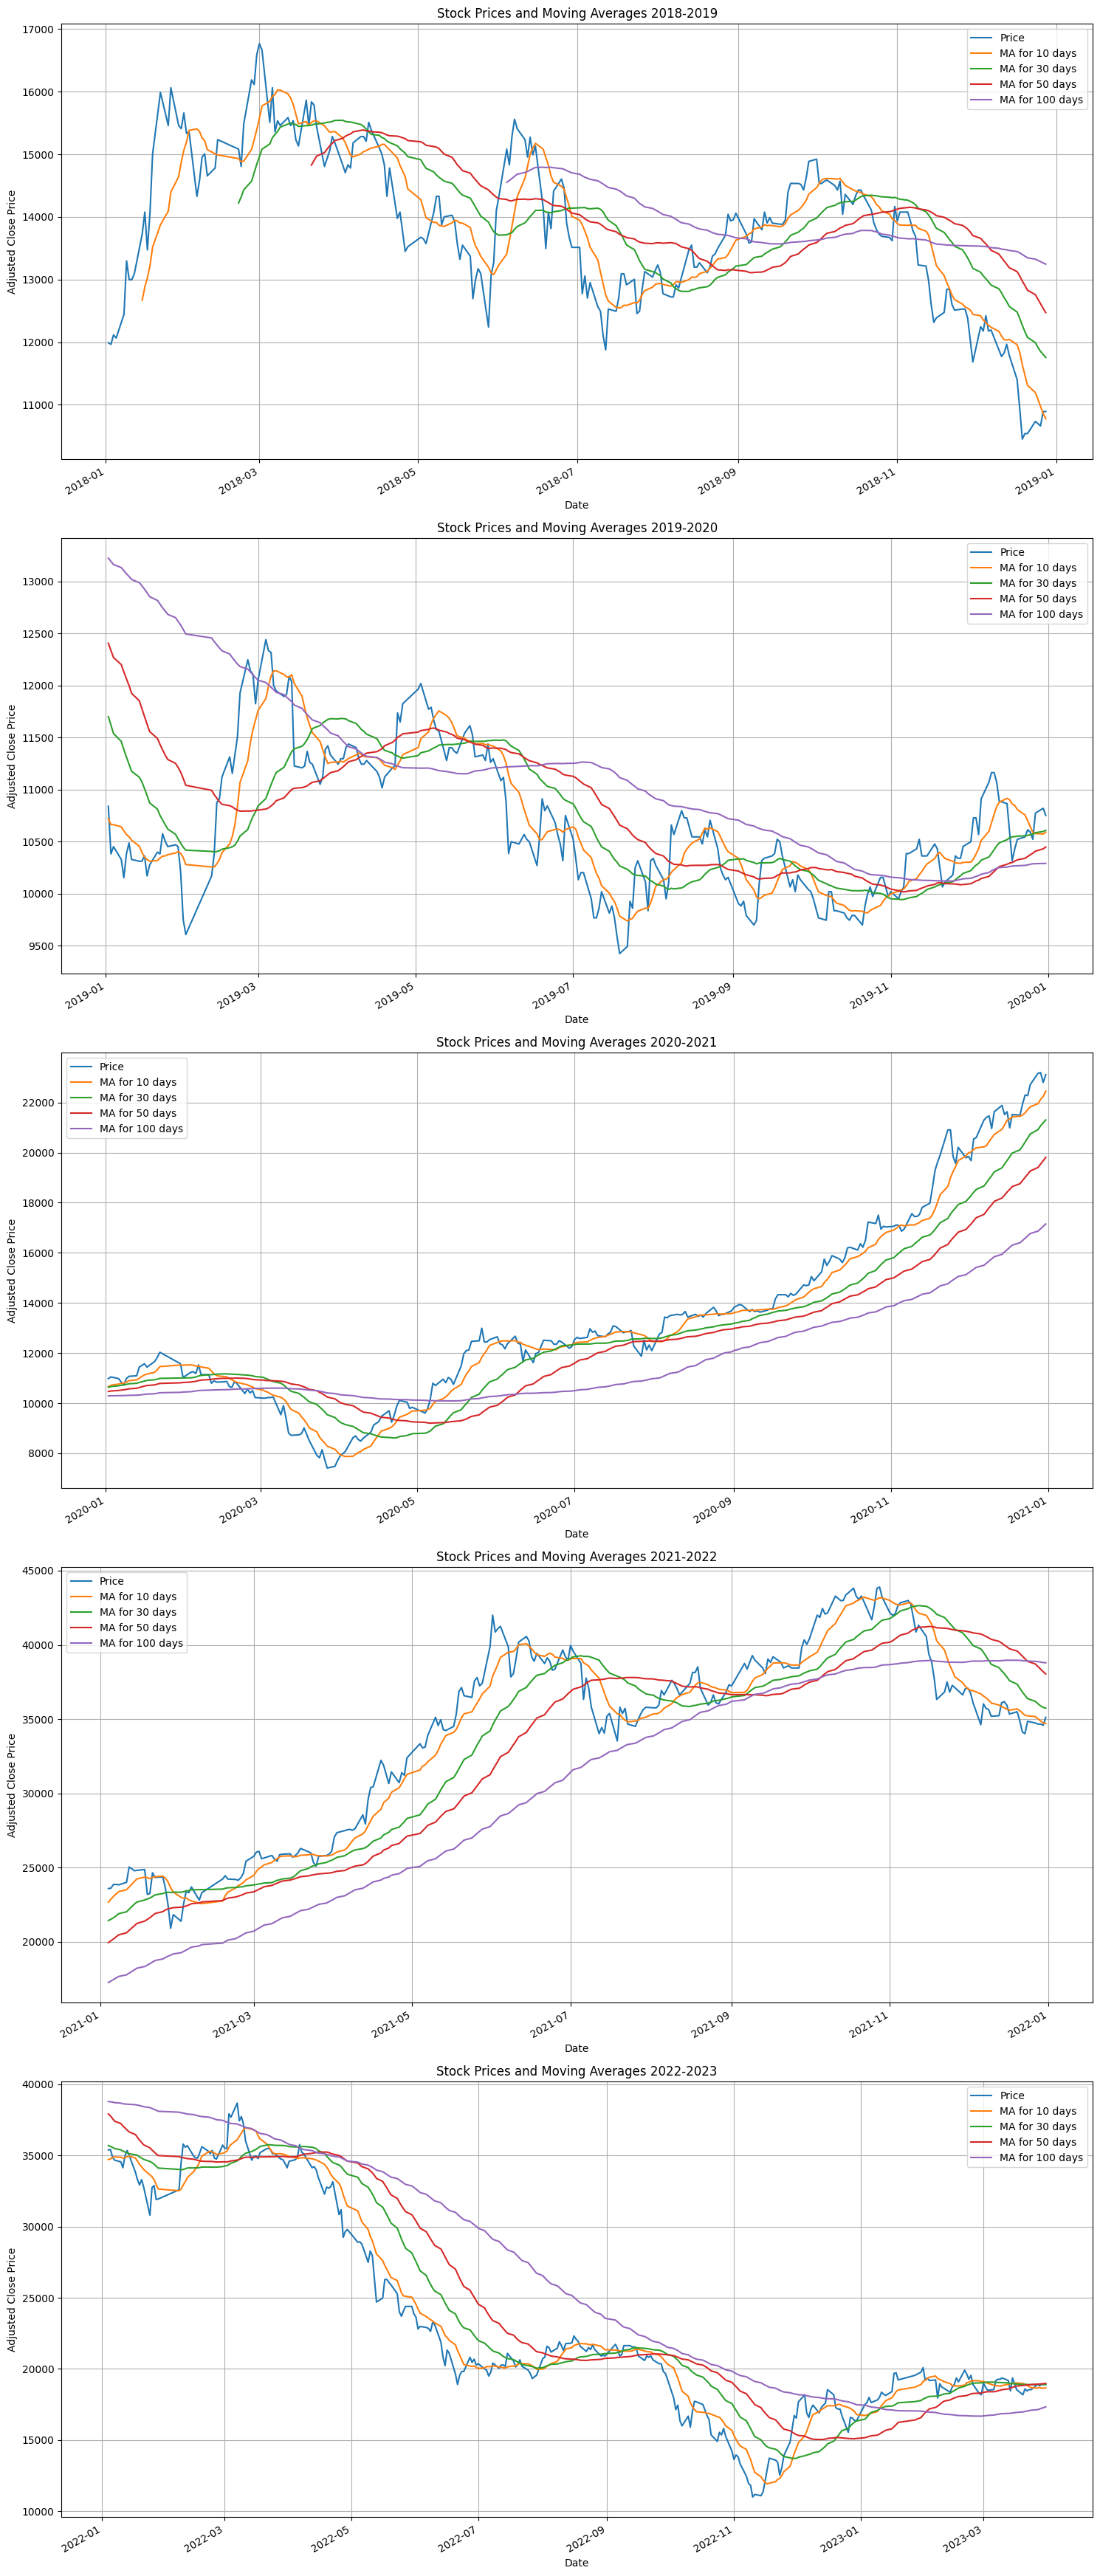

In [166]:
data.sort_index(inplace=True)  # Đảm bảo chỉ mục là đơn điệu tăng dần

# Tính các đường trung bình động (MA) GT TB đóng cửa của các ngày trước đó
ma_day = [10, 30, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Price'].rolling(ma).mean()

# Định nghĩa các khoảng thời gian
time_periods = [
    ('2018-01-02', '2019-01-01'),
    ('2019-01-01', '2020-01-01'),
    ('2020-01-01', '2021-01-01'),
    ('2021-01-01', '2022-01-01'),
    ('2022-01-01', '2023-03-31')
]

# Vẽ biểu đồ cho từng khoảng thời gian
fig, axs = plt.subplots(nrows=len(time_periods), figsize=(15, 35))

for ax, (start_date, end_date) in zip(axs, time_periods):
    period_data = data.loc[start_date:end_date]
    period_data[['Price', 'MA for 10 days', 'MA for 30 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=ax)

    ax.set_title(f'Stock Prices and Moving Averages {start_date[:4]}-{end_date[:4]}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted Close Price')
    ax.grid(True)

# Điều chỉnh bố cục để tránh chồng chéo giữa các biểu đồ
plt.tight_layout()
plt.show()

#### Exponential Moving Average (EMA)

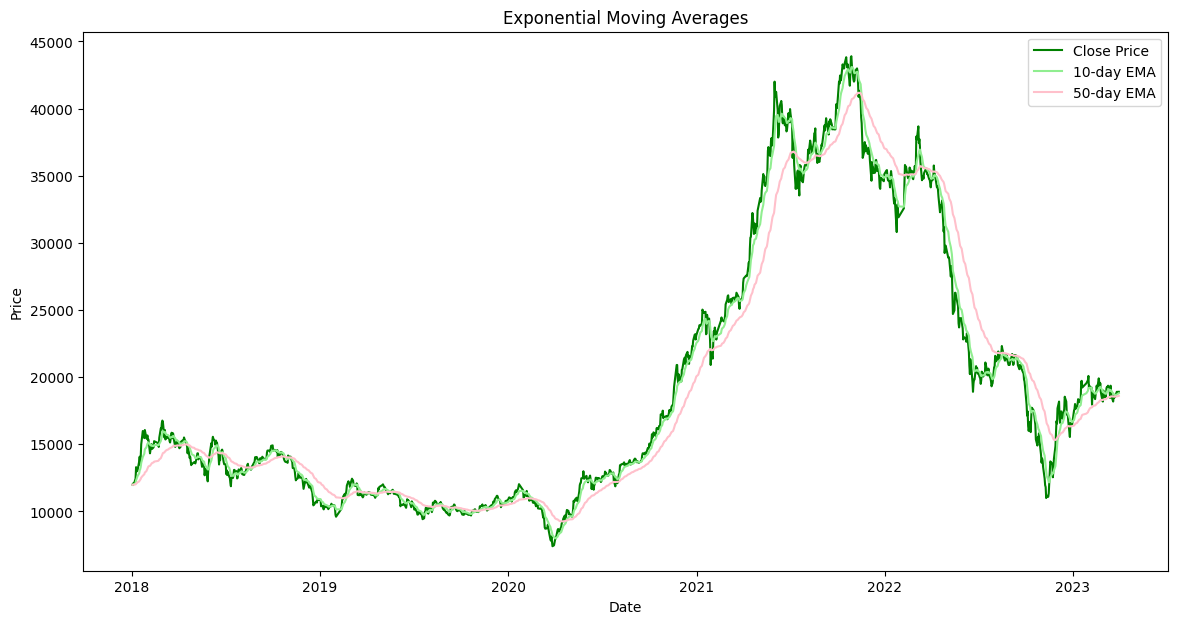

In [167]:
# Exponential Moving Average (EMA)
data['EMA_10'] = data['Price'].ewm(span=10, adjust=False).mean()
data['EMA_50'] = data['Price'].ewm(span=50, adjust=False).mean()

# Biểu đồ EMA
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Close Price', color='Green')
plt.plot(data.index, data['EMA_10'], label='10-day EMA', color='lightgreen')
plt.plot(data.index, data['EMA_50'], label='50-day EMA', color='pink')
plt.title('Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Relative Strength Index (RSI)

The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. It is calculated using the formula:

$$  \text{RSI} = 100 - \frac{100}{1 + \text{RS}}  $$

where $$ \text{RS} = \frac{\text{Average gain over a period}}{\text{Average loss over a period}} $$

In economic terms, RSI is used to identify overbought or oversold conditions in a market. An RSI above 70 typically indicates that a stock is overbought, while an RSI below 30 suggests that it is oversold.


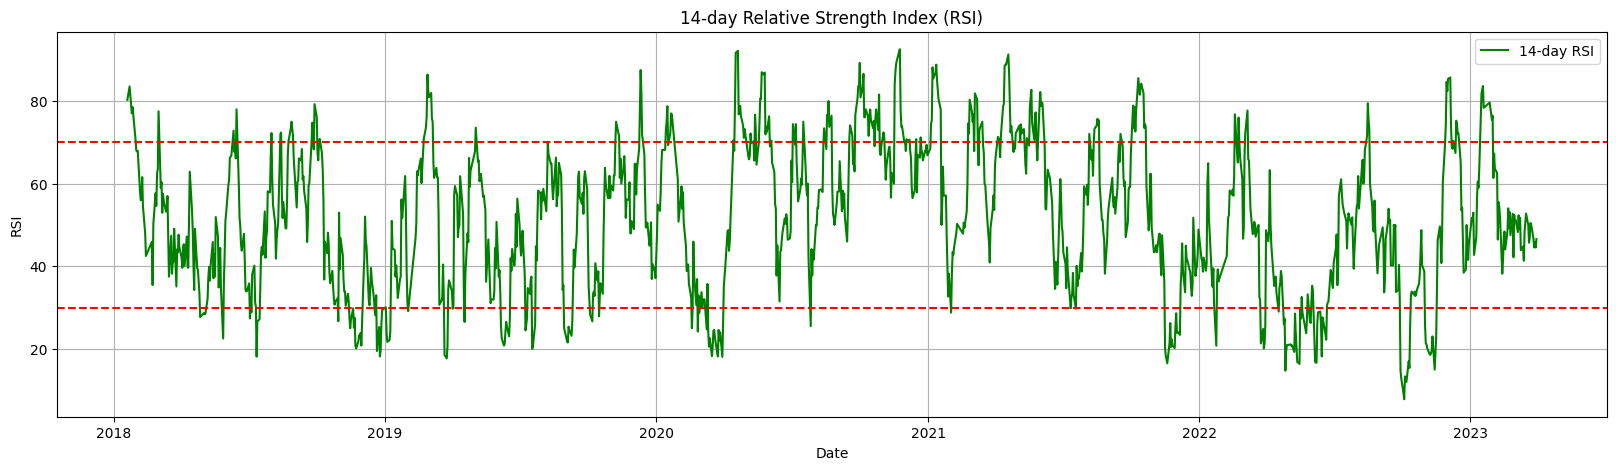

In [168]:
def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI_14'] = calculate_rsi(data['Price'], 14)  # 14-day RSI

# Vẽ biểu đồ RSI
plt.figure(figsize=(20, 5))
plt.plot(data.index, data['RSI_14'], label='14-day RSI', color='green')
plt.axhline(y=70, color='red', linestyle='--')
plt.axhline(y=30, color='red', linestyle='--')
plt.title('14-day Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In economic terms, the RSI is used to identify overbought or
oversold conditions in a market.
- An RSI above 70 typically
indicates that a stock is overbought, suggesting it may be overvalued and a price correction could be imminent.
- Conversely, an RSI below 30 suggests that a stock is oversold, indicating it may be undervalued and a price increase could be expected

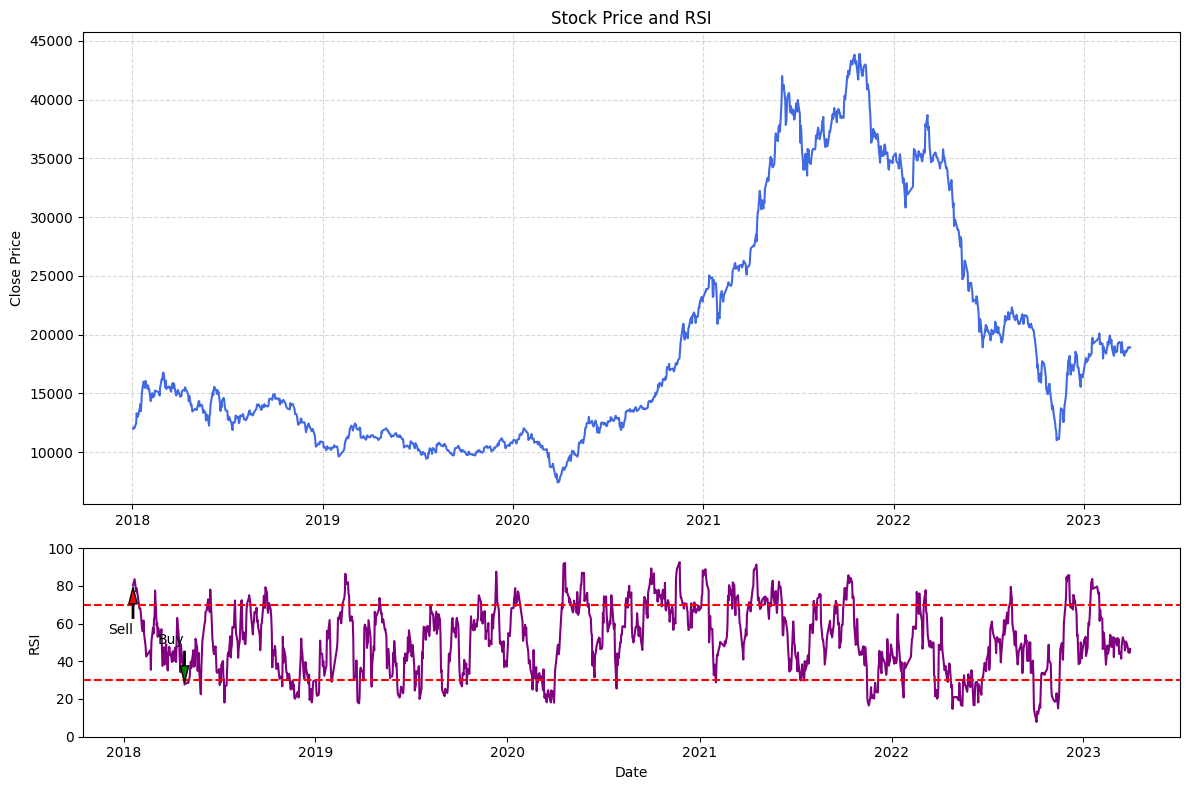

In [169]:
data = data.loc['2018-01-02':'2023-03-31']
data['Delta'] = data['Price'].diff()
# data = data.dropna()
# Lookback period for RSI calculation
window_length = 14

# Calculate gains and losses
data['Gain'] = np.where(data['Delta'] > 0, data['Delta'], 0)
data['Loss'] = np.where(data['Delta'] < 0, abs(data['Delta']), 0)

# Calculate average gain and average loss
data['Average Gain'] = data['Gain'].rolling(window=window_length).mean()
data['Average Loss'] = data['Loss'].rolling(window=window_length).mean()
# data = data.dropna()

data['RS'] = data['Average Gain'] / data['Average Loss']
data['RSI'] = 100 - (100 / (1 + data['RS']))

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [2.5,1]})

# Plot close price
ax1.plot(data.index, data['Price'], label='Close Price', color='royalblue')
ax1.set_ylabel('Close Price')
ax1.set_title('Stock Price and RSI')
ax1.grid(visible=True, alpha=0.5, linestyle='--')

# Plot RSI
ax2.plot(data.index, data['RSI'], label='RSI', color='Purple')
ax2.axhline(y=70, color='red', linestyle='--')  # Overbought threshold
ax2.axhline(y=30, color='red', linestyle='--')  # Oversold threshold
ax2.set_ylim([0 , 100])
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')

# Annotate a single buy signal
buy_date = data[data['RSI'] < 30].index[0]
buy_value = data.loc[buy_date, 'RSI']
ax2.annotate('Buy',
                xy=(buy_date, buy_value),
                xytext=(buy_date, buy_value + 20),
                arrowprops=dict(facecolor='green', shrink=0.05, width=1, headwidth=6),
                horizontalalignment='right', verticalalignment='bottom')

# Annotate a single sell signal
sell_date = data[data['RSI'] > 70].index[0]
sell_value = data.loc[sell_date, 'RSI']
ax2.annotate('Sell',
                xy=(sell_date, sell_value),
                xytext=(sell_date, sell_value - 20),
                arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=6),
                horizontalalignment='right', verticalalignment='top')

plt.tight_layout()
plt.show()


RSI is above the overbought level => the period 2020-2022 will increase in price very strongly. It is suggested that stock should be sold when RSI is not in "overbought area anymore"

In [170]:
# Create Figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3],
                    vertical_spacing=0.15,  # Adjust vertical spacing between subplots
                    subplot_titles=("Candlestick Chart", "RSI"))  # Add subplot titles

# Subplot 1: Plot candlestick chart
fig.add_trace(go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Price'],
    increasing_line_color='#00cc96',  # Green for increasing
    decreasing_line_color='#ff3e3e',  # Red for decreasing
    showlegend=False
), row=1, col=1)  # Specify row and column indices
fig.update_yaxes(fixedrange=False, row=1, col=1)

# Subplot 2: Plot RSI
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['RSI'],
    mode='lines',
    line=dict(color='Green', width=2),
    showlegend=False,
), row=2, col=1)

# Add upper/lower bounds
fig.update_yaxes(range=[-10, 110], row=2, col=1, fixedrange=True)
fig.add_hline(y=0, col=1, row=2, line_color="black", line_width=1.5)
fig.add_hline(y=100, col=1, row=2, line_color="black", line_width=1.5)

# Add overbought/oversold
fig.add_hline(y=30, col=1, row=2, line_color='#FF0000', line_width=1, line_dash='dash')
fig.add_hline(y=70, col=1, row=2, line_color='#FF0000', line_width=1, line_dash='dash')

layout = go.Layout(
    title='Candlestick Chart and RSI Subplots',
    title_font=dict(size=20),
    plot_bgcolor='#f2f2f2',
    yaxis=dict(title='Price', showgrid=True, gridcolor='#cccccc', tickfont=dict(size=12)),
    yaxis2=dict(title='RSI', showgrid=True, gridcolor='#cccccc', tickfont=dict(size=12)),
    height=800,
    width=1200,
    xaxis_rangeslider=dict(visible=True, thickness=0.03),
    xaxis=dict(type='category')
)


fig.update_layout(layout)
fig.show()


### Moving Average Convergence Divergence (MACD)

The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. It is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA:

$$
\text{MACD} = \text{EMA}_{12} - \text{EMA}_{26}
$$

**A signal line** (9-day EMA of the MACD) is then plotted on top of the MACD to function as a trigger for buy and sell signals.

MACD is significant in economics as it helps traders understand whether the bullish or bearish momentum in the price is strengthening or weakening.

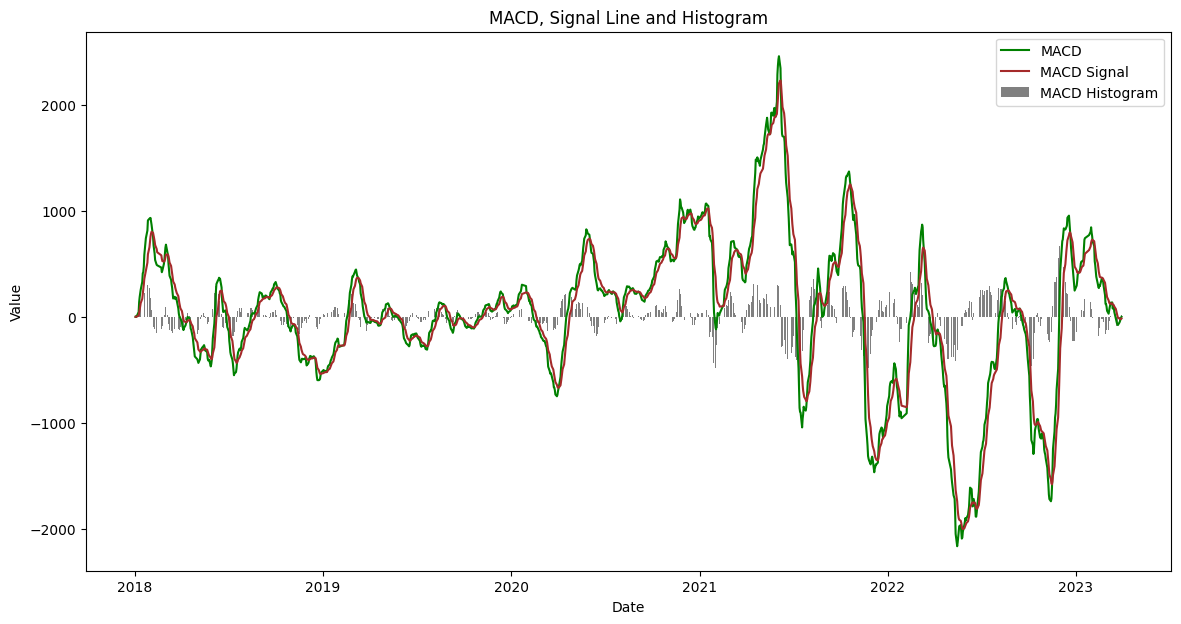

In [171]:
short_window = 12
long_window = 26
signal_window = 9

data['EMA_12'] = data['Price'].ewm(span=short_window, adjust=False).mean()
data['EMA_26'] = data['Price'].ewm(span=long_window, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['MACD_Signal'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['MACD_Signal']

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['MACD'], label='MACD', color='Green')
plt.plot(data.index, data['MACD_Signal'], label='MACD Signal', color='brown')
plt.bar(data.index, data['MACD_Hist'], label='MACD Histogram', color='grey')
plt.title('MACD, Signal Line and Histogram')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



### Bollinger Band

Bollinger Bands consist of a middle band being a simple moving average (SMA) and two outer bands (upper and lower) which are standard deviations away from the middle band. They are calculated as follows:


$$ \text{Upper Band} = \text{SMA}(n) + k \times \sigma $$



$$ \text{Lower Band} = \text{SMA}(n) - k \times \sigma $$


where n is the number of periods, k is the number of standard deviations, and \sigma is the standard deviation.

Bollinger Bands are significant in economics as they provide a relative definition of high and low prices of a market, helping traders to identify overbought or oversold conditions.

In [172]:
data['MA-20'] = data['Price'].rolling(window=20).mean()
data['STD-20'] = data['Price'].rolling(window=20).std()
data['Upperband'] = data['MA-20'] + (data['STD-20'] * 2)
data['Lowerband'] = data['MA-20'] - (data['STD-20'] * 2)

In [173]:
plt.figure(figsize=(20, 9))
plt.plot(data.index, data['Price'], label='Price', color='blue')
plt.plot(data.index, data['MA-20'], label='MA-20', color='lightgreen')
plt.plot(data.index, data['Upperband'], label='Upperband', color='green')
plt.plot(data.index, data['Lowerband'], label='Lowerband', color='green')
plt.fill_between(data.index, data['Upperband'], data['Lowerband'], color='green', alpha=0.1)

# Thiết lập tiêu đề và nhãn
plt.title('Bollinger Band over Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

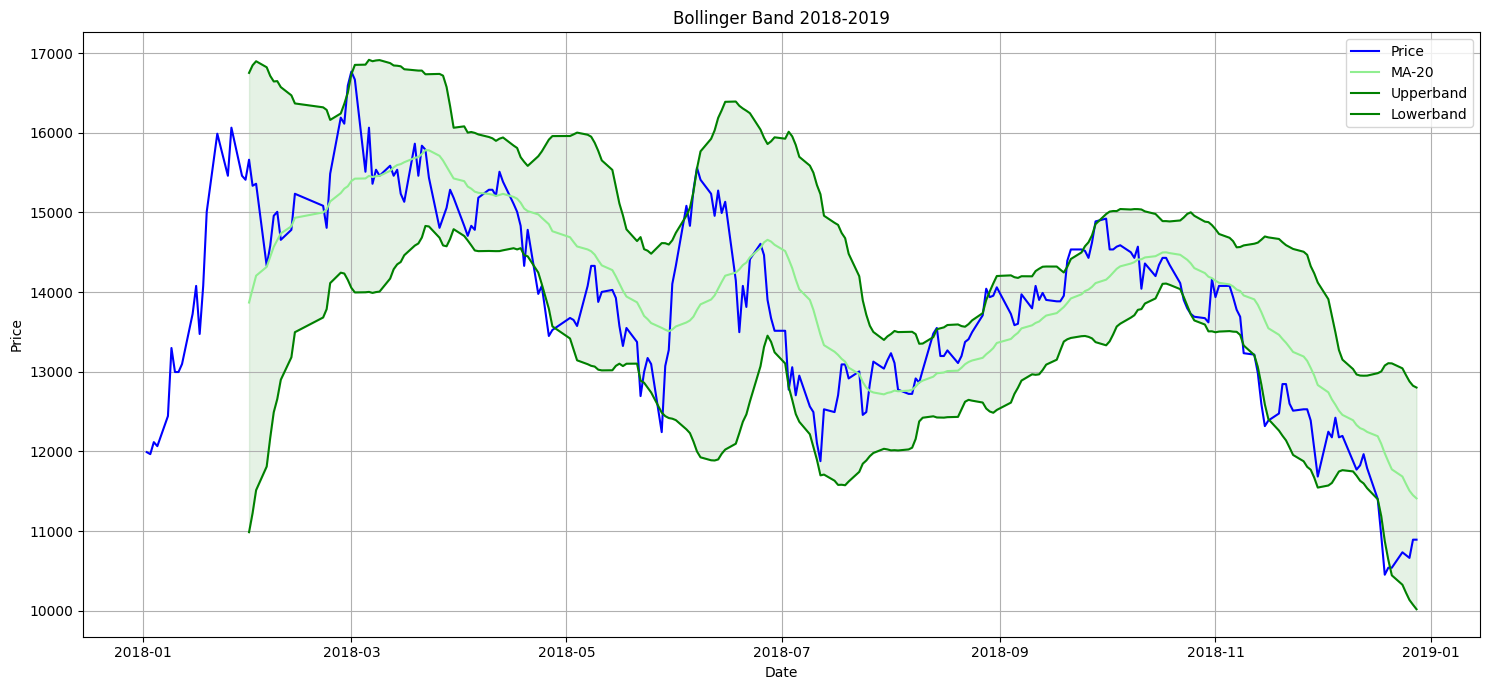

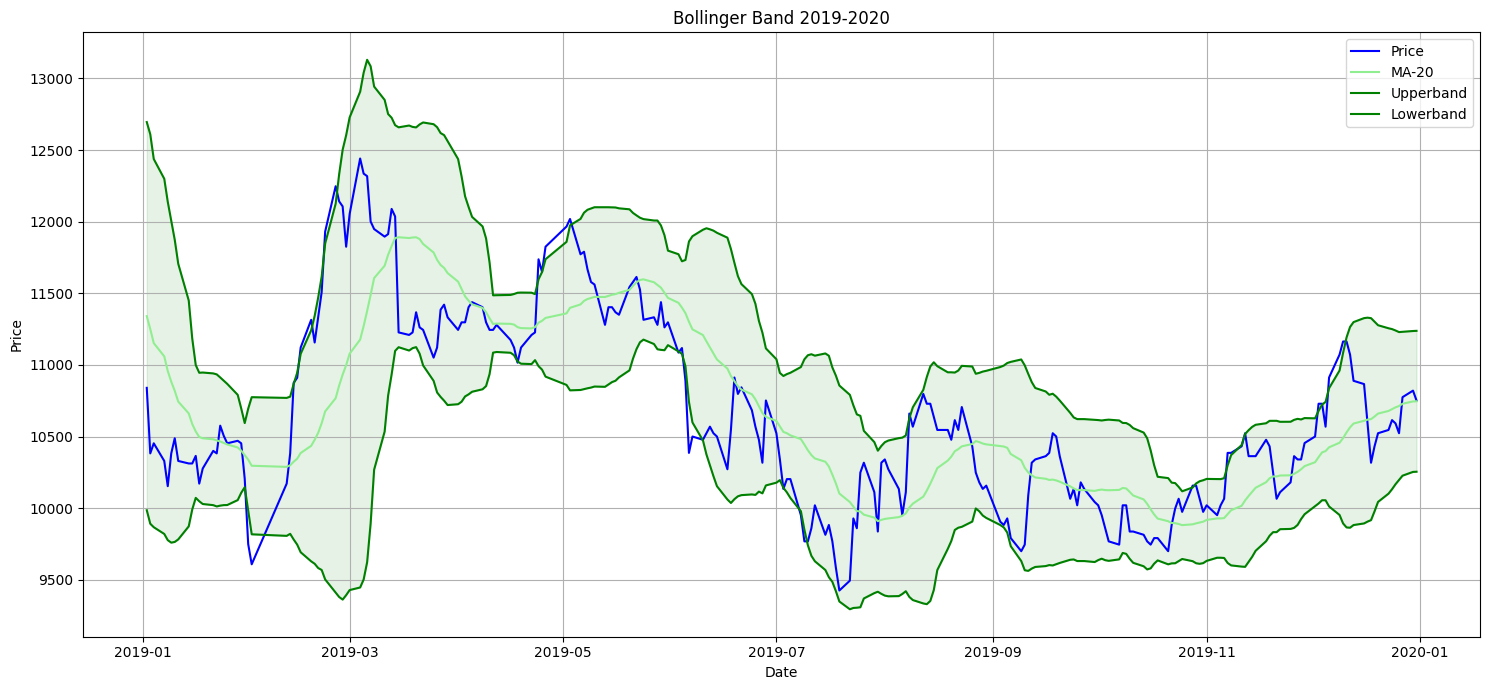

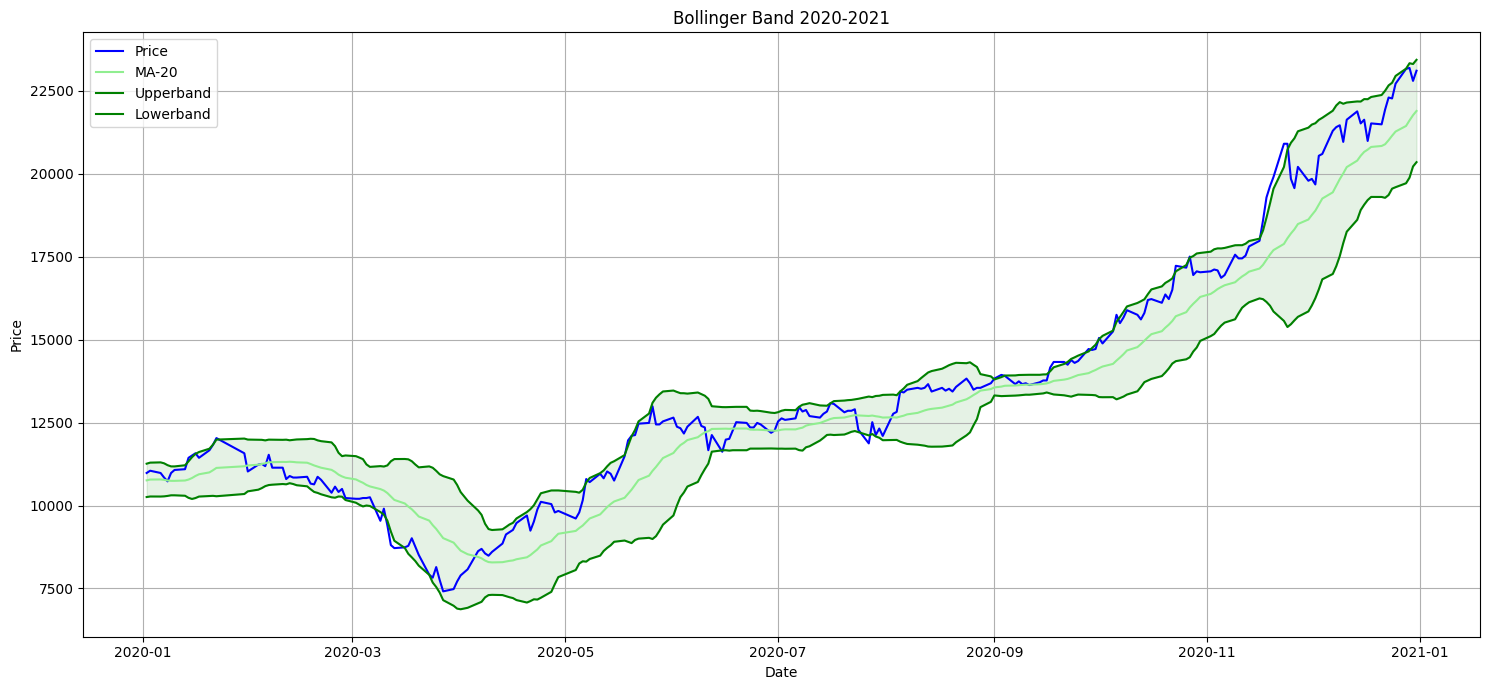

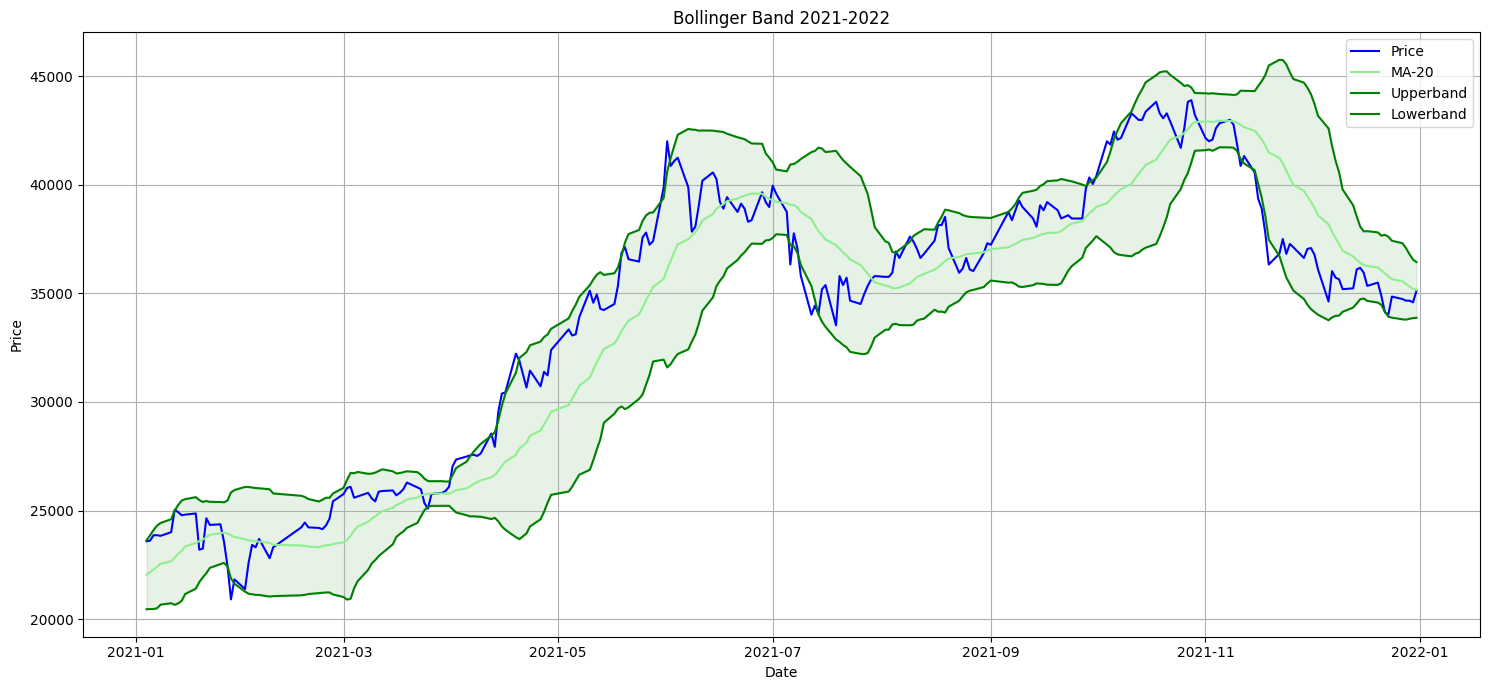

In [174]:
time_periods = [
    ('2018-01-02', '2019-01-01'),
    ('2019-01-01', '2020-01-01'),
    ('2020-01-01', '2021-01-01'),
    ('2021-01-01', '2022-01-01'),
    ('2022-01-01', '2023-03-31')
]

# Vẽ biểu đồ cho từng khoảng thời gian
for i, (start_date, end_date) in enumerate(time_periods):
    fig, ax = plt.subplots(figsize=(15, 7))

    period_data = data.loc[start_date:end_date]

    ax.plot(period_data.index, period_data['Price'], label='Price', color='blue')
    ax.plot(period_data.index, period_data['MA-20'], label='MA-20', color='lightgreen')
    ax.plot(period_data.index, period_data['Upperband'], label='Upperband', color='green')
    ax.plot(period_data.index, period_data['Lowerband'], label='Lowerband', color='green')
    ax.fill_between(period_data.index, period_data['Upperband'], period_data['Lowerband'], color='green', alpha=0.1)

    ax.set_title(f'Bollinger Band {start_date[:4]}-{end_date[:4]}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

<u> <b> Comment</b></u>:
- When the stock price reaches the Upper Band (i.e., it is 2 times the standard deviation above the MA-20), it indicates that the stock may be overbought and has a tendency to decrease in price.
- Conversely, when the stock price hits the Lower Band (i.e., it is 2 times the standard deviation below the MA-20), it suggests that the stock may be oversold and has a tendency to increase in price.

=> This analysis can be particularly helpful for making informed stock trading decisions, providing clear indications of potential price reversals.

#3. Feature Selection and Engineering

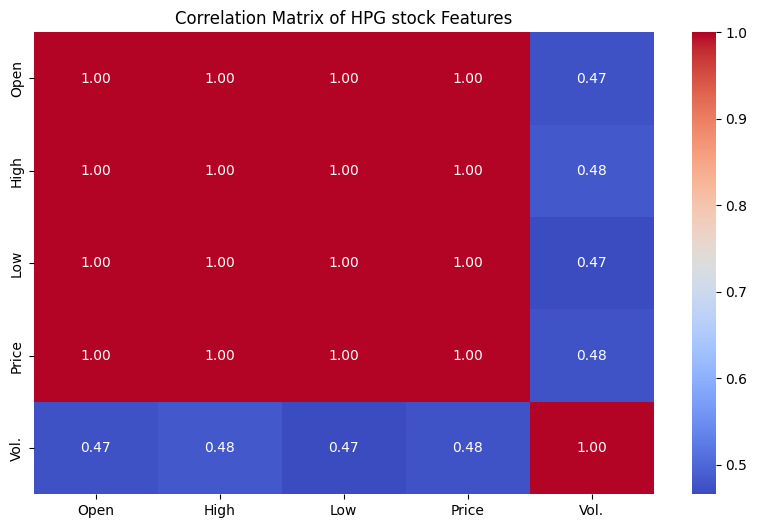

In [175]:
correlation_matrix = data[['Open', 'High', 'Low', 'Price', 'Vol.']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of HPG stock Features')
plt.show()

**Comment:**

From the correlation matrix, we observe that the `open`,
`high`, `low`, and `Price` are highly correlated with each other, while the `Vol.` has a very low correlation with the other features. Given the equivalent level of impact of `open`, `high`, `low`, and `close`, we decide to select the `Price`  as the feature for our stock price prediction model.

=> In conclusion, due to the high correlation among `open`,
`high`, `low`, and `Price`, and the similar impact on
the stock price prediction, we choose `Price` as the primary
feature for our predictive modeling.

#4. Model Building and Evaluation

### Data Preprocessing

In [176]:
df = data[['Price']]
df
df_train = df.loc['2018-01-02':'2022-02-28']
df_test = df.loc['2022-03-01':'2023-03-31']

print("Training set:")
print(df_train)
print("Testing set:")
print(df_test)

Training set:
              Price
Date               
2018-01-02  11991.0
2018-01-03  11965.9
2018-01-04  12116.7
2018-01-05  12066.4
2018-01-08  12443.5
...             ...
2022-02-22  35116.6
2022-02-23  35343.7
2022-02-24  34813.9
2022-02-25  34738.2
2022-02-28  35722.1

[1035 rows x 1 columns]
Testing set:
              Price
Date               
2022-03-01  35495.0
2022-03-02  35495.0
2022-03-03  37916.9
2022-03-04  37689.8
2022-03-07  38673.7
...             ...
2023-03-27  18909.0
2023-03-28  18818.0
2023-03-29  18909.0
2023-03-30  18909.0
2023-03-31  18909.0

[273 rows x 1 columns]


Plotting the autocorrelation and partial autocorrelation of the training data to identify the order of the ARIMA model.

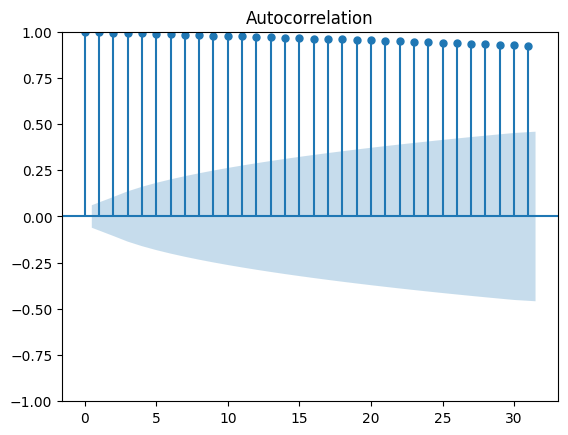

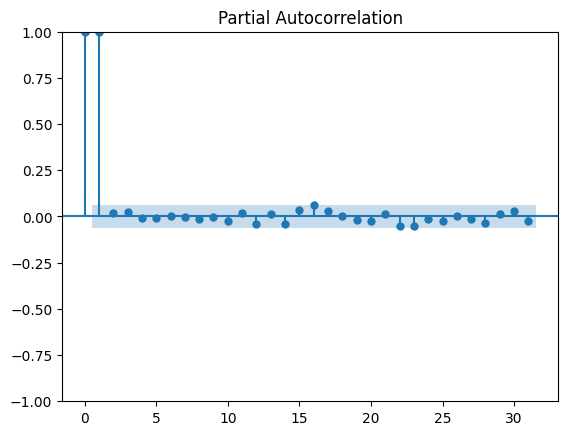

In [177]:
plot_acf(df_train['Price'])
plot_pacf(df_train['Price'])
plt.show()

**ACF plot:**  

While the Dickey-Fuller test initially indicated stationarity, the autocorrelation function (ACF) plot reveals strong evidence of non-stationarity in the time series data. The high and slowly decaying autocorrelations suggest the presence of a trend or other non-stationary components that were not captured by the Dickey-Fuller test.

 **PACF plot:**


  A potential ARIMA model for this time series could be an AR(2) model. This model would include two autoregressive terms, corresponding to the significant spikes at lags 1 and 2.


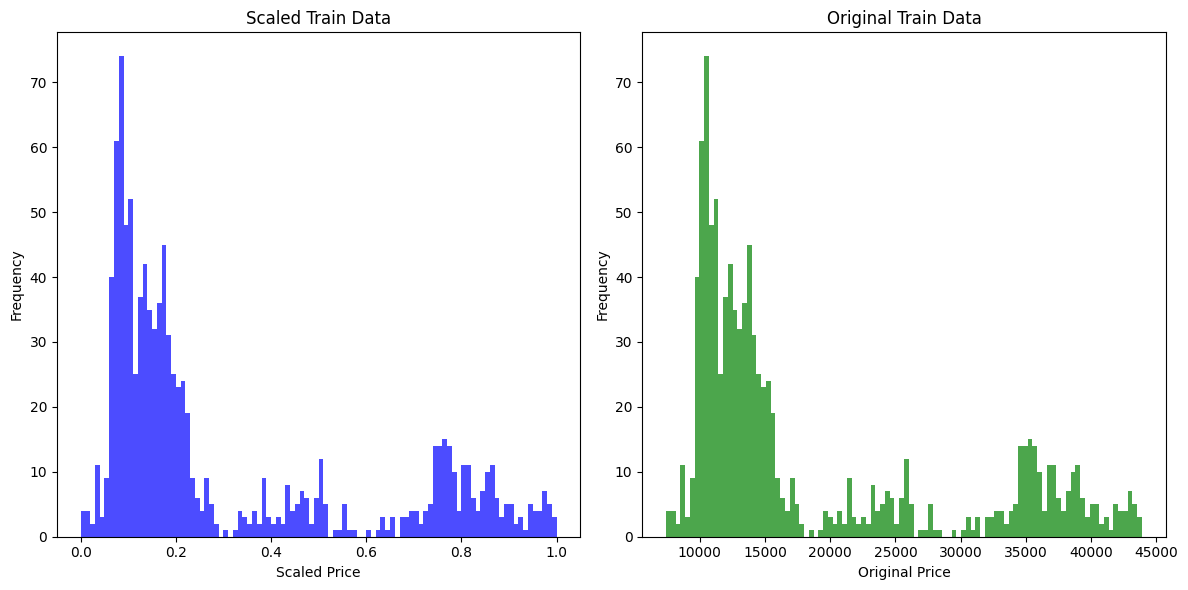

               Price
Date                
2022-03-01  0.769740
2022-03-02  0.769740
2022-03-03  0.836123
2022-03-04  0.829898
2022-03-07  0.856866


In [178]:
scaler = MinMaxScaler()
df_train['Price'] = scaler.fit_transform(df_train)

# Vẽ biểu đồ histogram của dữ liệu gốc và dữ liệu đã scale
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_train['Price'].plot.hist(bins=100, color='blue', alpha=0.7)
plt.title('Scaled Train Data')
plt.xlabel('Scaled Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df.loc['2018-01-02':'2022-02-28']['Price'].plot.hist(bins=100, color='green', alpha=0.7)
plt.title('Original Train Data')
plt.xlabel('Original Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scale test data
df_test['Price'] = scaler.transform(df_test)
print(df_test.head())

**Noted**


**Scaled Train Data:** The x-axis represents the scaled price values, typically ranging between 0 and 1, while the y-axis represents the frequency of occurrence of each scaled price value. The distribution appears to be somewhat uniform, with a slight right skew, suggesting that the majority of scaled prices are concentrated towards the lower end of the range.

**Original Train Data: ** The x-axis represents the original price values, while the y-axis represents the frequency. The distribution is heavily right-skewed, indicating that most prices are concentrated at lower values, with a long tail extending towards higher prices.




In [179]:
print('Training data shape: ', df_train.shape)
print('Test data shape: ', df_test.shape)

Training data shape:  (1035, 1)
Test data shape:  (273, 1)


In [180]:
# Specify the number of steps to forecast ahead
HORIZON = 6
print('Forecasting horizon:', HORIZON, 'days')

df_test_shifted = df_test.copy()
for t in range(1, HORIZON):
    df_test_shifted['close+' + str(t)] = df_test_shifted['Price'].shift(-t)
df_test_shifted = df_test_shifted.dropna(how='any')
df_test_shifted.head(5)

# Fit ARIMA model
order = (1, 1, 1)
model = ARIMA(df_train, order=order)
results = model.fit()

print(results.summary())

Forecasting horizon: 6 days
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1035
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3058.817
Date:                Mon, 17 Jun 2024   AIC                          -6111.634
Time:                        16:27:36   BIC                          -6096.810
Sample:                             0   HQIC                         -6106.009
                               - 1035                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0381      1.013      0.038      0.970      -1.947       2.023
ma.L1         -0.0162      1.015     -0.016      0.987      -2.006       1.974
sigma2         0.0002   

###ARIMA Model Training and Evaluation

#### Check Stationarity and Dickey-Fuller test

In [181]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(ts_data):
    roll_mean = ts_data.rolling(30, center=True, closed='both').mean()
    roll_std = ts_data.rolling(5, center=True, closed='both').std()

    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(ts_data, color='black', label='Original Data')
    plt.plot(roll_mean, color='red', label='Rolling Mean(30 days)')
    plt.legend()
    plt.subplot(212)
    plt.plot(roll_std, color='green', label='Rolling Std Dev(5 days)')
    plt.legend()

    # Dickey-Fuller test
    print('Dickey-Fuller test results\n')
    df_test = adfuller(ts_data, regresults=False)
    test_result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','# of lags','# of obs'])
    print(test_result)
    for k,v in df_test[4].items():
        print('Critical value at %s: %1.5f' %(k,v))

Dickey-Fuller test results

Test Statistic      -1.186168
p-value              0.679518
# of lags           15.000000
# of obs          1292.000000
dtype: float64
Critical value at 1%: -3.43542
Critical value at 5%: -2.86378
Critical value at 10%: -2.56796


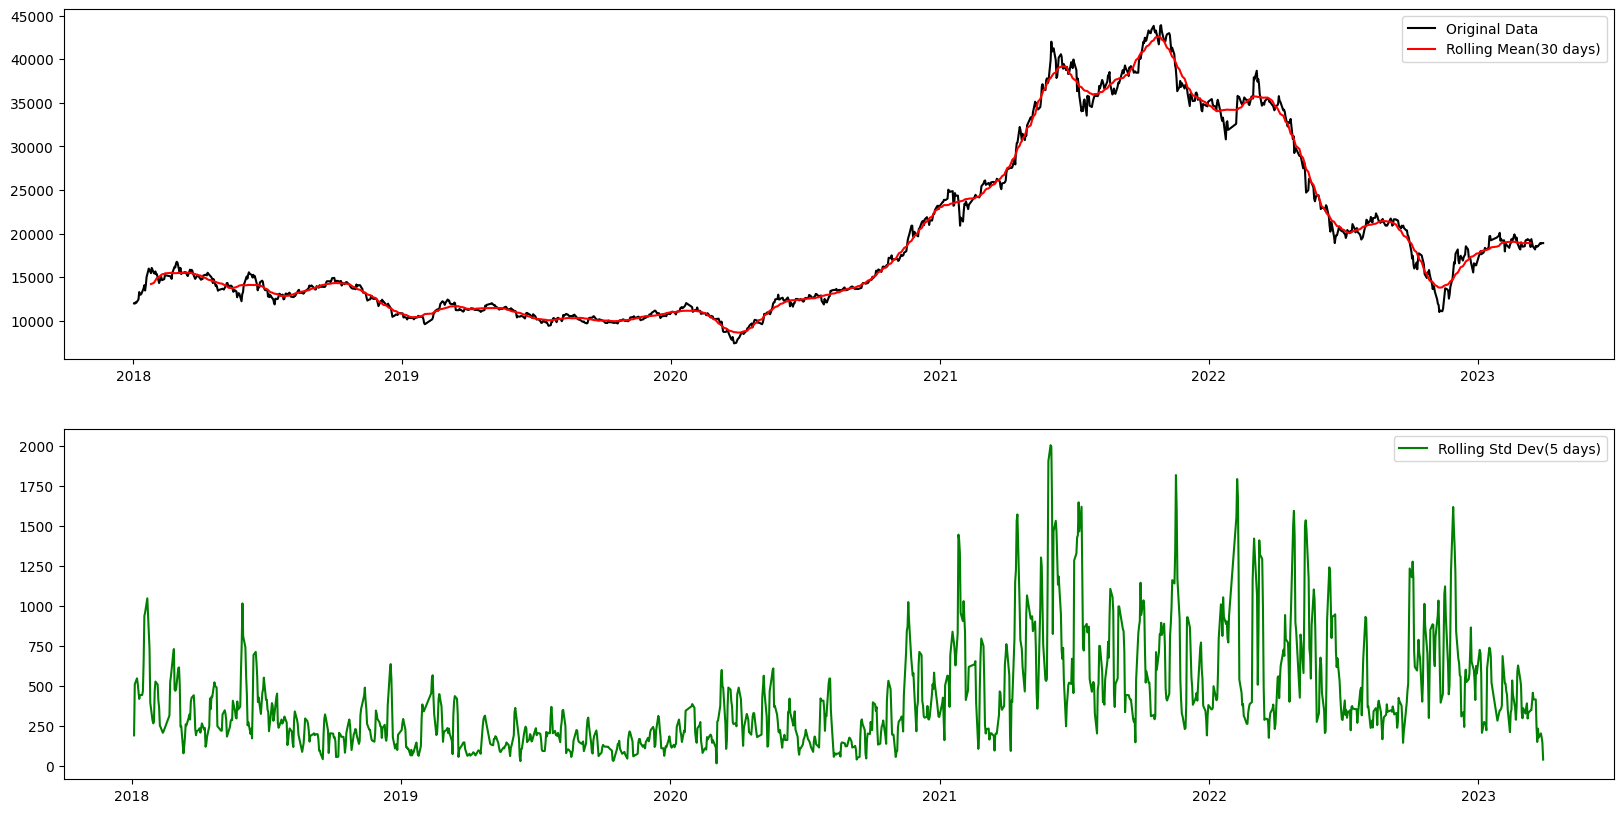

In [182]:
df_final = pd.Series(df['Price'])
check_stationarity(df_final)

**Comment**

**Non-Stationarity:** The upward and downward trends observed in the time series data indicate that the series is not stationary. This is consistent with the ACF plot, where the autocorrelation decays slowly, suggesting non-stationarity.                             
           
**Autoregressive (AR) Component**: The significant PACF value at lag 1 suggests the presence of an autoregressive component (p in ARIMA). This means that the current value of the time series is influenced by its immediate past value.                          
**Moving Average (MA) Component**: The significant ACF value at lag 1 suggests the presence of a moving average component (q in ARIMA). This means that the current value of the time series is influenced by the past forecast errors.

Dickey-Fuller test results

Test Statistic   -7.711239e+00
p-value           1.262215e-11
# of lags         1.400000e+01
# of obs          1.292000e+03
dtype: float64
Critical value at 1%: -3.43542
Critical value at 5%: -2.86378
Critical value at 10%: -2.56796


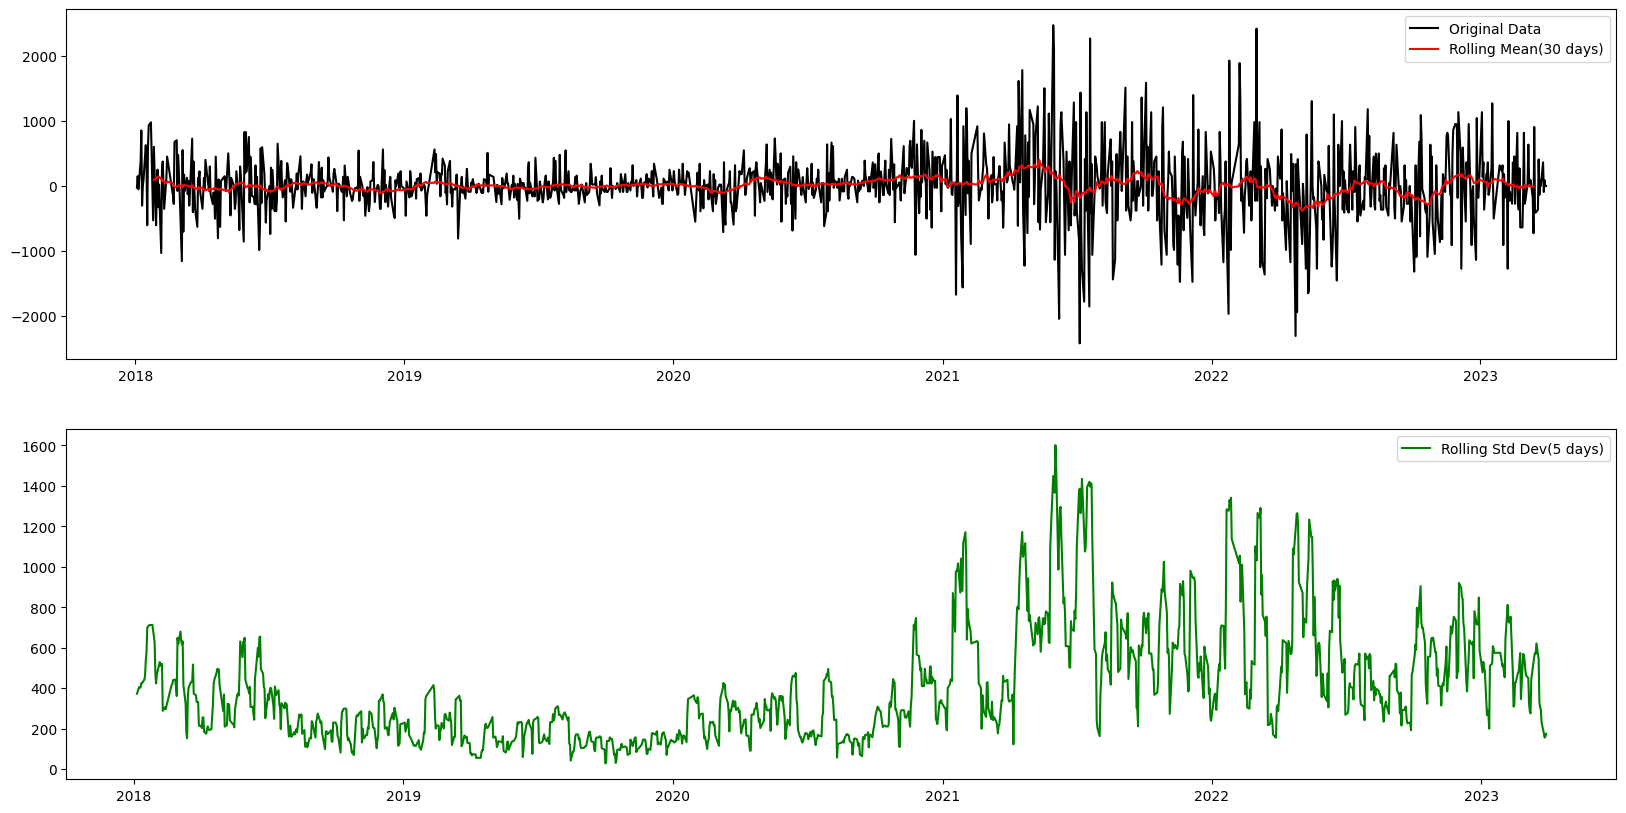

In [183]:
df_final_diff = df_final - df_final.shift()
df_final_diff.dropna(inplace=True)
check_stationarity(df_final_diff)

**Differencing:** To make the time series stationary, differencing (d in ARIMA) would be necessary. The order of differencing (d) might be 1 or 2, depending on the nature of the trend.

#### Training and evaluation

In [184]:
# Evaluate model
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(df_train[['Price']])
test_scaled = scaler.transform(df_test_shifted[['Price']])

train_ts = pd.Series(train_scaled.flatten(), index=df_train.index)
test_ts = pd.Series(test_scaled.flatten(), index=df_test_shifted.index)

p = d = q = range(0, 3)
best_aic = np.inf
best_order = None

for p_val in p:
    for d_val in d:
        for q_val in q:
            try:
                model = ARIMA(train_ts, order=(p_val, d_val, q_val))
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p_val, d_val, q_val)
            except:
                continue

print(f'Best ARIMA parameters: {best_order} with AIC: {best_aic}')

Best ARIMA parameters: (2, 1, 0) with AIC: -6116.614694801068


The Best ARIMA parameters: (2, 1, 0) with AIC: -6116.614694801068

**Comment**                                           

 Automatically find the best-fitting ARIMA model for the data by trying out various combinations of parameters and selecting the model with the lowest AIC (Akaike Information Criterion). AIC is a model evaluation criterion that balances the goodness of fit of the model to the data with the complexity of the model (number of parameters).

In [185]:
# Train and test ARIMA with the best parameters
training_window = 30  # dedicate 30 days for training

train_ts = df_train['Price']
test_ts = df_test_shifted

history = [x for x in train_ts]
history = history[(-training_window):]

predictions = []

order = best_order  # update with best (p,d,q)

for i in range(test_ts.shape[0]):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast(steps=HORIZON)
    predictions.append(output)
    obs = list(test_ts.iloc[i])
    history.append(obs[0])
    history.pop(0)
    print(test_ts.index[i])
    print(i + 1, ': predicted =', output, 'expected =', obs)

2022-03-01 00:00:00
1 : predicted = [0.77957121 0.77326218 0.77164053 0.77302738 0.77359047 0.77330927] expected = [0.7697401600701677, 0.7697401600701677, 0.8361226839162372, 0.8298980374958886, 0.8568660234623395, 0.8226400613967766]
2022-03-02 00:00:00
2 : predicted = [0.76253569 0.76342729 0.76528311 0.76522894 0.76476656 0.76473864] expected = [0.7697401600701677, 0.8361226839162372, 0.8298980374958886, 0.8568660234623395, 0.8226400613967766, 0.8309368490297115]
2022-03-03 00:00:00
3 : predicted = [0.77105756 0.7711623  0.77089181 0.77084814 0.77090191 0.77091543] expected = [0.8361226839162372, 0.8298980374958886, 0.8568660234623395, 0.8226400613967766, 0.8309368490297115, 0.816415414976428]
2022-03-04 00:00:00
4 : predicted = [0.83985355 0.82375414 0.8219327  0.82578569 0.82644974 0.82554044] expected = [0.8298980374958886, 0.8568660234623395, 0.8226400613967766, 0.8309368490297115, 0.816415414976428, 0.7842615941234514]
2022-03-07 00:00:00
5 : predicted = [0.81196345 0.81380109

#### Compare predictions to actual load

In [186]:
training_window= 30 # dedicate 30 days for training

train_ts=df_train['Price']
test_ts=df_test_shifted

In [187]:
train_test = np.array(train_ts)
test_set = np.array(test_ts)
pred = np.array(predictions)

# Đảm bảo các mảng là 2D bằng cách sử dụng reshape
pred = scaler.inverse_transform(pred.reshape(-1, 1))
test_set = scaler.inverse_transform(test_set.reshape(-1, 1))

In [188]:
print(test_set.shape)
print(pred.shape)

(1608, 1)
(1608, 1)


In [189]:
# evaluate forecasts
mae = mean_absolute_error(test_set, pred)
rmse = np.sqrt(mean_squared_error(test_set, pred))
r2_test = r2_score(test_set, pred)
print('Mean Absolute Error (MAE): %.4f' % mae)
print('Test RMSE: %.4f' % rmse)
print('Test r2_score: %.4f' % r2_test)

Mean Absolute Error (MAE): 0.0243
Test RMSE: 0.0326
Test r2_score: 0.9638


In [190]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = df_test.index[0:len(df_test.index)-HORIZON+1]
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.array(np.transpose(test_ts)).ravel()
eval_df[['prediction', 'actual']] = scaler.inverse_transform(eval_df[['prediction', 'actual']])
eval_df.head()

timestamp    h  prediction    actual
0 2022-03-01  t+1    0.779571  0.769740
1 2022-03-02  t+1    0.762536  0.769740
2 2022-03-03  t+1    0.771058  0.836123
3 2022-03-04  t+1    0.839854  0.829898
4 2022-03-07  t+1    0.811963  0.856866

In [191]:
if(HORIZON > 1):
    eval_df['APE'] = (eval_df['prediction'] - eval_df['actual']).abs() / eval_df['actual']
    print(eval_df.groupby('h')['APE'].mean())

h
t+1    0.039284
t+2    0.058491
t+3    0.072531
t+4    0.086228
t+5    0.097329
t+6    0.108534
Name: APE, dtype: float64


In [192]:
def mape(predictions, actuals):
    """Mean absolute percentage error"""
    return ((predictions - actuals).abs() / actuals).mean()

In [193]:
print('One step forecast MAPE: ', (mape(eval_df[eval_df['h'] == 't+1']['prediction'], eval_df[eval_df['h'] == 't+1']['actual']))*100, '%')

One step forecast MAPE:  3.92843229335754 %


In [194]:
print('Multi-step forecast MAPE: ', mape(eval_df['prediction'], eval_df['actual'])*100, '%')

Multi-step forecast MAPE:  7.7066152243889645 %


In [195]:
import math

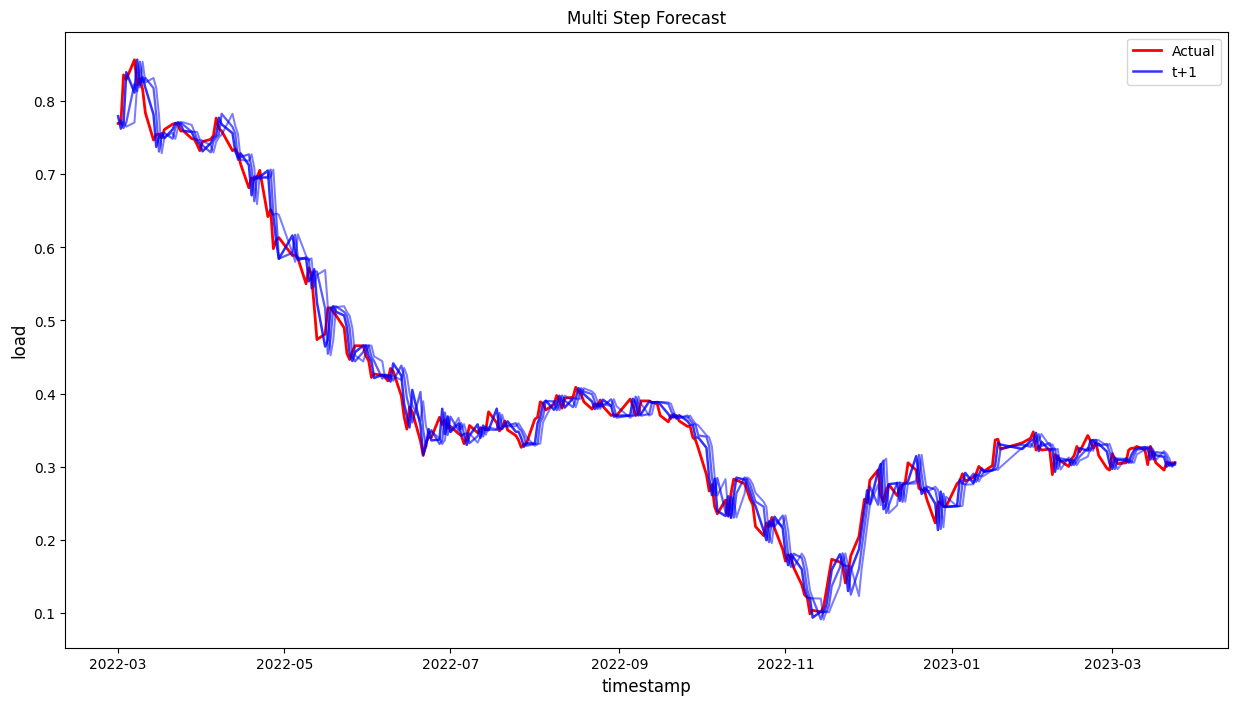

In [196]:
HORIZON = 3
if(HORIZON == 1):
    ## Plotting single step forecast
    eval_df.plot(x='timestamp', y=['actual', 'prediction'], style=['r', 'b'], figsize=(15, 8))
    plt.xlabel('timestamp', fontsize=12)
    plt.ylabel('load', fontsize=12)
    plt.title('Single Step Forecast')
    plt.legend(['Actual', 'Prediction'])
    plt.show()

else:
    ## Plotting multi step forecast
    plot_df = eval_df[eval_df.h == 't+1'][['timestamp', 'actual']].copy()
    for t in range(1, HORIZON + 1):
        plot_df['t+' + str(t)] = eval_df[eval_df.h == 't+' + str(t)]['prediction'].values

    plt.figure(figsize=(15, 8))
    plt.plot(plot_df['timestamp'], plot_df['actual'], color='red', linewidth=2.0, label='Actual')

    for t in range(1, HORIZON + 1):
        x = plot_df['timestamp'][(t - 1):]
        y = plot_df['t+' + str(t)][0:len(x)]
        plt.plot(x, y, color='blue', linewidth=2 * math.pow(.9, t), alpha=math.pow(0.8, t), label=f't+{t}' if t == 1 else "")

    plt.xlabel('timestamp', fontsize=12)
    plt.ylabel('load', fontsize=12)
    plt.title('Multi Step Forecast')
    plt.legend(loc='best')
    plt.show()

### Long short-term memory (LSTM)

975/975 ━━━━━━━━━━━━━━━━━━━━ 57s 54ms/step - loss: 0.0046
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
Mean Absolute Error (MAE): 1181.5377
Test RMSE: 1440.2883
Test R² Score: 0.7185


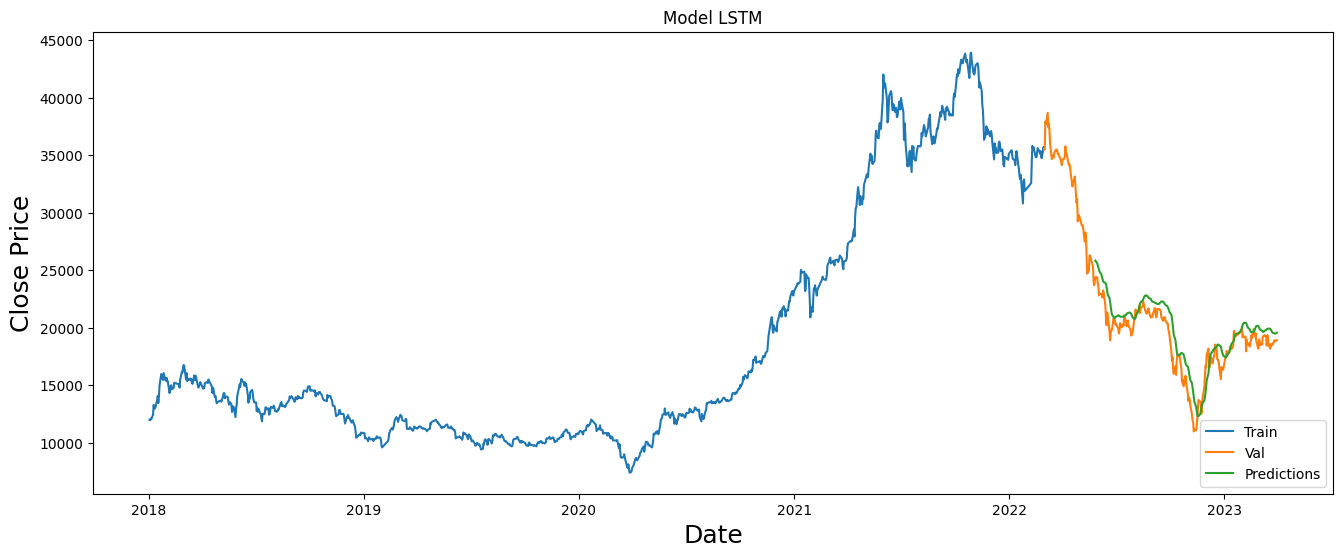

In [197]:
# Filter to get the 'Price' column
df_new = data.filter(['Price'])

# Define the date range for prediction and validation
start_date = '2022-03-01'
end_date = '2023-03-31'

# Split the data into training and testing sets based on the date range
train_data = df_new[df_new.index < start_date]
test_data = df_new[(df_new.index >= start_date) & (df_new.index <= end_date)]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# Create the training data set
x_train = []
y_train = []

for i in range(60, len(scaled_train_data)):
    x_train.append(scaled_train_data[i-60:i, 0])
    y_train.append(scaled_train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
x_test = []
y_test = df_new.loc[start_date:end_date].values[60:]  # Ensure y_test matches x_test length

for i in range(60, len(scaled_test_data)):
    x_test.append(scaled_test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Calculate additional metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Test RMSE: {rmse:.4f}')
print(f'Test R² Score: {r2_test:.4f}')

# Plot the data
train = df_new[:start_date]
valid = df_new[start_date:end_date]
valid['Predictions'] = np.nan  # Initialize with NaNs
valid['Predictions'].iloc[60:] = predictions.flatten()  # Assign predictions from the correct index

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Conclusion

In [199]:
# Define the metrics and values
metrics = ['Metric', 'ARIMA', 'LSTM']
mae = ['Mean Absolute Error (MAE)', 0.0243, 1181.5377]
rmse = ['Test RMSE (Root Mean Squared Error)', 0.0326, 1440.2883]
r_squared = ['Test R-squared (R²)', 0.9638, 0.7185]

# Print the table header
print(f"| {' | '.join(metrics)} |")
print(f"|{'-' * 38}|")

# Print the rows
print(f"| {mae[0]:<38} | {mae[1]:^8.4f} | {mae[2]:^8.4f} |")
print(f"| {rmse[0]:<38} | {rmse[1]:^8.4f} | {rmse[2]:^8.4f} |")
print(f"| {r_squared[0]:<38} | {r_squared[1]:^8.4f} | {r_squared[2]:^8.4f} |")


| Metric | ARIMA | LSTM |
|--------------------------------------|
| Mean Absolute Error (MAE)              |  0.0243  | 1181.5377 |
| Test RMSE (Root Mean Squared Error)    |  0.0326  | 1440.2883 |
| Test R-squared (R²)                    |  0.9638  |  0.7185  |



In conclusion: ARIMA outperforms LSTM across all three metrics, demonstrating significantly better accuracy, lower error magnitudes, and a stronger ability to explain the variance in the data